# Benchmarking of extrachromosomal circular DNA (eccDNA) and circular RNA detection software

In [40]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [41]:
from functions.load_bed_file import load_bed_file
from functions.compare_circular_data import analyze_circular_data
from functions.metrics import plot_circular_detection
from functions.coordinates_precision import plot_coordinates_precision
from functions.lengths import plot_length_distributions, plot_length_distributions_kde
from functions.repeat_elements import annotate_repeat_elements, process_repeat_elements, calculate_repeat_element_metrics, plot_stats_repeat_elements, plot_stats_repeat_elements
from functions.genomic_elements import annotate_genomic_elements, annotate_bed_files_genomic_elements, process_genomic_elements, calculate_genomic_element_metrics, plot_stats_genomic_elements
from functions.combinations import plot_fscore_stripplot
from functions.matrix import matrix


# 1. In silico

In this study, we performed a comprehensive evaluation of 5 extrachromosomal circular DNA (eccDNA) detection software (Circle-Map, CIRCexplorer2, CircleFinder, ecc_finder-bwa, and ecc_finder-minimap2) and 5 circualr RNA (circRNA) detection software (CIRCexplorer2, circRNA_finder, CIRIquant, find_circ, and segemehl). The objective of this study was to evaluated their performance on both simulated and real datasets and propose a protocol for a accurate detection of eccDNA and circRNA.

For that, first we created 1,000 circles with the following characteristics:

- eccDNA was created from all the genome and circRNA from the transcript region.
- Length: [175, 10,000]
- Lognormal distribution (mean = 1,000, sd = 1)
- Biological mutation ratio: 0.01 (Kimura model)
- Sequencing error rate: 0.001 (random)

Additionally, 1,000 linear fragments with the same characteristics as the circular molecule (except for a minimum length of 501) from randomly selected genomic regions were introduced as false positive molecules.

# Non filtered 

In [42]:
# Define paths and parameters
eccDNA_bed = '/data/benchmarking/data/insilico/eccDNA/eccDNA.bed'
eccDNA_dir = '/data/benchmarking/data/insilico/eccDNA/unfilter'
eccDNA_output = '/data/benchmarking/results/eccDNA/insilico/unfilter/treshold'
eccDNA_tools = ['CIRCexplorer2', 'Circle-Map', 'Circle_finder', 'ecc_finder-bwa', 'ecc_finder-minimap2']

circRNA_bed = '/data/benchmarking/data/insilico/circRNA/circRNA.bed'
circRNA_dir = '/data/benchmarking/data/insilico/circRNA/unfilter'
circRNA_output = '/data/benchmarking/results/circRNA/insilico/unfilter/treshold'
circRNA_tools = ['CIRCexplorer2', 'circRNA_finder', 'CIRIquant', 'find_circ', 'segemehl']

coverages = [5, 7, 10, 15, 20, 30, 50, 70, 100]

In [43]:
eccDNA_output = '/data/benchmarking/results/eccDNA/insilico/unfilter'
analyze_circular_data(eccDNA_dir, eccDNA_bed, eccDNA_output, eccDNA_tools, coverages)

KeyboardInterrupt: 

In [ ]:
eccDNA_base_dir = 'results/eccDNA/insilico/unfilter/statistics'
eccDNA_output = f'{eccDNA_base_dir}/graphs/'

data_files = [
    'truepositives.csv',
    'falsepositives.csv',
    'falsenegatives.csv',
    'fscore.csv',
    'recall.csv',
    'precision.csv'
]

stats = ['True Positives', 'False Positives', 'False Negatives', 'F-score', 'Recall', 'Precision']

for data_file, name in zip(data_files, stats):
    data_path = f'{eccDNA_base_dir}/{data_file}'
    plot_circular_detection(data_path, name, eccDNA_output, 'eccDNA')

In [ ]:
circRNA_output = '/data/benchmarking/results/circRNA/insilico/unfilter'
analyze_circular_data(circRNA_dir, circRNA_bed, circRNA_output, circRNA_tools, coverages)

In [ ]:
circRNA_base_dir = 'results/circRNA/insilico/unfilter/statistics'
circRNA_output = f'{circRNA_base_dir}/graphs/'

for data_file, name in zip(data_files, stats):
    data_path = f'{circRNA_base_dir}/{data_file}'
    plot_circular_detection(data_path, name, circRNA_output, 'circRNA')

## Split filtering

In [ ]:
# Define paths and parameters
eccDNA_dir = '/data/benchmarking/data/insilico/eccDNA/filter_split'
eccDNA_output = '/data/benchmarking/results/eccDNA/insilico/filter_split/treshold'

circRNA_dir = '/data/benchmarking/data/insilico/circRNA/filter_split'
circRNA_output = '/data/benchmarking/results/circRNA/insilico/filter_split/treshold'

In [ ]:
eccDNA_output = '/data/benchmarking/results/eccDNA/insilico/filter_split'
analyze_circular_data(eccDNA_dir, eccDNA_bed, eccDNA_output, eccDNA_tools, coverages)

In [ ]:
eccDNA_base_dir = 'results/eccDNA/insilico/filter_split/statistics'
eccDNA_output = f'{eccDNA_base_dir}/graphs/'

for data_file, name in zip(data_files, stats):
    data_path = f'{eccDNA_base_dir}/{data_file}'
    plot_circular_detection(data_path, name, eccDNA_output, 'eccDNA')

In [ ]:
circRNA_output = '/data/benchmarking/results/circRNA/insilico/filter_split'
analyze_circular_data(circRNA_dir, circRNA_bed, circRNA_output, circRNA_tools, coverages)

In [ ]:
circRNA_base_dir = 'results/circRNA/insilico/filter_split/statistics'
circRNA_output = f'{circRNA_base_dir}/graphs/'

for data_file, name in zip(data_files, stats):
    data_path = f'{circRNA_base_dir}/{data_file}'
    plot_circular_detection(data_path, name, circRNA_output, 'circRNA')

## Duplicates filtering

In [ ]:
# Define paths and parameters
eccDNA_dir = '/data/benchmarking/data/insilico/eccDNA/filter_duplicates'
eccDNA_output = '/data/benchmarking/results/eccDNA/insilico/filter_duplicates/treshold'

circRNA_dir = '/data/benchmarking/data/insilico/circRNA/filter_duplicates'
circRNA_output = '/data/benchmarking/results/circRNA/insilico/filter_duplicates/treshold'

In [ ]:
eccDNA_output = '/data/benchmarking/results/eccDNA/insilico/filter_duplicates'
analyze_circular_data(eccDNA_dir, eccDNA_bed, eccDNA_output, eccDNA_tools, coverages)

In [ ]:
eccDNA_base_dir = 'results/eccDNA/insilico/filter_duplicates/statistics'
eccDNA_output = f'{eccDNA_base_dir}/graphs/'

for data_file, name in zip(data_files, stats):
    data_path = f'{eccDNA_base_dir}/{data_file}'
    plot_circular_detection(data_path, name, eccDNA_output, 'eccDNA')

In [ ]:
circRNA_output = '/data/benchmarking/results/circRNA/insilico/filter_duplicates'
analyze_circular_data(circRNA_dir, circRNA_bed, circRNA_output, circRNA_tools, coverages)

In [ ]:
circRNA_base_dir = 'results/circRNA/insilico/filter_duplicates/statistics'
circRNA_output = f'{circRNA_base_dir}/graphs/'

for data_file, name in zip(data_files, stats):
    data_path = f'{circRNA_base_dir}/{data_file}'
    plot_circular_detection(data_path, name, circRNA_output, 'circRNA')

## 1.1 Coordinates precision

In [ ]:
# Define paths and parameters
eccDNA_bed = '/data/benchmarking/data/insilico/eccDNA/eccDNA.bed'
eccDNA_dir = '/data/benchmarking/data/insilico/eccDNA/filter'
eccDNA_output = '/data/benchmarking/results/eccDNA/insilico/treshold'
eccDNA_tools = ['CIRCexplorer2', 'Circle-Map', 'Circle_finder', 'ecc_finder-bwa', 'ecc_finder-minimap2']

circRNA_bed = '/data/benchmarking/data/insilico/circRNA/circRNA.bed'
circRNA_dir = '/data/benchmarking/data/insilico/circRNA/filter'
circRNA_output = '/data/benchmarking/results/circRNA/insilico/treshold'
circRNA_tools = ['CIRCexplorer2', 'circRNA_finder', 'CIRIquant', 'find_circ', 'segemehl']

coverages = [5, 7, 10, 15, 20, 30, 50, 70, 100]

In [ ]:
plot_coordinates_precision(eccDNA_tools, coverages, eccDNA_bed, eccDNA_dir, eccDNA_output, circle_type = 'eccDNA')

In [ ]:
plot_coordinates_precision(circRNA_tools, coverages, circRNA_bed, circRNA_dir, circRNA_output, circle_type = 'circRNA')

## 1.2 Detection metrics

In [ ]:
eccDNA_output = '/data/benchmarking/results/eccDNA/insilico'
analyze_circular_data(eccDNA_dir, eccDNA_bed, eccDNA_output, eccDNA_tools, coverages)

In [ ]:
eccDNA_base_dir = 'results/eccDNA/insilico/statistics'
eccDNA_output = f'{eccDNA_base_dir}/graphs/'

data_files = [
    'truepositives.csv',
    'falsepositives.csv',
    'falsenegatives.csv',
    'fscore.csv',
    'recall.csv',
    'precision.csv'
]

stats = ['True Positives', 'False Positives', 'False Negatives', 'F-score', 'Recall', 'Precision']

for data_file, name in zip(data_files, stats):
    data_path = f'{eccDNA_base_dir}/{data_file}'
    plot_circular_detection(data_path, name, eccDNA_output, 'eccDNA')

In [ ]:
circRNA_output = '/data/benchmarking/results/circRNA/insilico'
analyze_circular_data(circRNA_dir, circRNA_bed, circRNA_output, circRNA_tools, coverages)

In [ ]:
circRNA_base_dir = 'results/circRNA/insilico/statistics'
circRNA_output = f'{circRNA_base_dir}/graphs/'

for data_file, name in zip(data_files, stats):
    data_path = f'{circRNA_base_dir}/{data_file}'
    plot_circular_detection(data_path, name, circRNA_output, 'circRNA')

In [ ]:
import os
import pandas as pd

base_path = "data/insilico/eccDNA"
folders = ["unfilter", "filter_split", "filter_duplicates", "filter"]
tools = ["CIRCexplorer2", "Circle-Map", "Circle_finder", "ecc_finder-bwa", "ecc_finder-minimap2"]
cov_values = [5, 7, 10, 15, 20, 30, 50, 70, 100]

# Crear un diccionario para almacenar los conteos de filas
data = []

# Iterar sobre herramientas y valores de cobertura
for tool in tools:
    for cov in cov_values:
        row_counts = {"Tool": tool, "Coverage": cov}
        for folder in folders:
            bed_file = os.path.join(base_path, folder, tool, f"cov{cov}_{tool}.bed")
            if os.path.exists(bed_file):
                with open(bed_file, "r") as f:
                    row_count = sum(1 for line in f)
            else:
                row_count = 0
            row_counts[folder.capitalize()] = row_count
        data.append(row_counts)

# Crear el DataFrame y exportarlo como CSV
df = pd.DataFrame(data)
os.makedirs("results/eccDNA/insilico/statistics", exist_ok=True)
df.to_csv("results/eccDNA/insilico/statistics/eccDNA_bed_counts.csv", index=False)

# Mostrar la tabla
print(df)

In [ ]:
import os
import pandas as pd

# Definir rutas y herramientas
base_path = "data/insilico/circRNA"
folders = ["unfilter", "filter_split", "filter_duplicates", "filter"]
tools = ["CIRCexplorer2", "circRNA_finder", "CIRIquant", "find_circ", "segemehl"]
cov_values = [5, 7, 10, 15, 20, 30, 50, 70, 100]

# Crear un diccionario para almacenar los conteos de filas
data = []

# Iterar sobre herramientas y valores de cobertura
for tool in tools:
    for cov in cov_values:
        row_counts = {"Tool": tool, "Coverage": cov}
        for folder in folders:
            bed_file = os.path.join(base_path, folder, tool, f"cov{cov}_{tool}.bed")
            if os.path.exists(bed_file):
                with open(bed_file, "r") as f:
                    row_count = sum(1 for line in f)
            else:
                row_count = 0
            row_counts[folder.capitalize()] = row_count
        data.append(row_counts)

# Crear el DataFrame y exportarlo como CSV
df = pd.DataFrame(data)
df.to_csv("results/circRNA/insilico/statistics/circRNA_bed_counts.csv", index=False)

# Mostrar la tabla
print(df)

## Length distribution

In [ ]:
def plot_length_distributions(circular_bed, filter_directory, tools, output_base_name, circle_type, draw_rectangle=True, min_length=320, max_length=480):
    """
    Generate KDE plots comparing the relative and absolute length distributions of filtered detections for multiple tools.

    Parameters:
        circular_bed (str): Path to the known circular BED file (ground truth).
        filter_directory (str): Directory containing filtered detection BED files.
        tools (list): List of tool names.
        output_base_name (str): Base name for output files.
        circle_type (str): Circle type.
        draw_rectangle (bool): Whether to draw the colored rectangle for 320-480 bp range (default is True).
        min_length (int): Minimum length of the rectangle (default is 320).
        max_length (int): Maximum length of the rectangle (default is 480).

    Returns:
        None
    """
    # Import the colorblind palette from seaborn
    color_palette = ['#d46014', '#ddcd3d', '#064b76ff', '#63bdf6ff', '#b54582']

    # Load lengths from known circles BED file (Simulated data)
    known_lengths = np.loadtxt(circular_bed, usecols=(2,), dtype=int) - np.loadtxt(circular_bed, usecols=(1,), dtype=int)
    known_lengths_df = pd.DataFrame({'Length': known_lengths, 'Tool': 'Simulated'})

    # Prepare a DataFrame for all tool lengths
    all_data = known_lengths_df.copy()

    for tool in tools:
        filtered_file = os.path.join(filter_directory, tool, f'cov30_{tool}.bed')
        if os.path.exists(filtered_file):
            try:
                filtered_lengths = np.loadtxt(filtered_file, usecols=(2,), dtype=int) - np.loadtxt(filtered_file, usecols=(1,), dtype=int)
                tool_df = pd.DataFrame({'Length': filtered_lengths, 'Tool': tool})
                all_data = pd.concat([all_data, tool_df], ignore_index=True)
            except Exception as e:
                print(f"Error reading {filtered_file}: {e}")
        else:
            print(f"Warning: File {filtered_file} not found. Skipping {tool}.")

    def plot_relative_distribution(data, length_range, bins, output_filename, title, draw_rectangle, min_length, max_length, is_short=True):
        """
        Plot relative length distributions with optional rectangle highlighting.

        Parameters:
            data (pd.DataFrame): DataFrame containing 'Length' and 'Tool' columns.
            length_range (tuple): Range of lengths to plot (min_length, max_length).
            bins (array): Bin edges for the length intervals.
            output_filename (str): Path to save the plot.
            title (str): Title of the plot.
            draw_rectangle (bool): Whether to draw a rectangle highlighting the length range.
            min_length (int): Minimum length for the rectangle.
            max_length (int): Maximum length for the rectangle.
            is_short (bool): Whether the data is for short lengths (default is True).

        Returns:
            None
        """
        # Filter data within the specified range
        data = data[(data['Length'] >= length_range[0]) & (data['Length'] < length_range[1])].copy()

        # Create intervals
        data['Length_Interval'] = pd.cut(data['Length'], bins, right=False)
        data['Length_Interval'] = data['Length_Interval'].apply(lambda x: int(x.left))

        # Count the number of circles per interval for each tool
        length_counts = data.groupby(['Tool', 'Length_Interval']).size().reset_index(name='Count')

        # Get the counts for Simulated lengths in the same intervals
        simulated_counts = length_counts[length_counts['Tool'] == 'Simulated'][['Length_Interval', 'Count']]
        simulated_counts.rename(columns={'Count': 'Simulated_Count'}, inplace=True)

        # Merge with the simulated counts to calculate the relative counts
        relative_data = length_counts.merge(simulated_counts, on='Length_Interval', how='left')
        relative_data['Relative'] = relative_data['Count'] / relative_data['Simulated_Count']

        # Remove simulated data from the plot
        relative_data = relative_data[relative_data['Tool'] != 'Simulated']

        # Plot relative length distributions
        plt.figure(figsize=(10, 5))
        g = sns.lineplot(data=relative_data, x="Length_Interval", y="Relative", hue="Tool", marker='o', palette=color_palette)

        # Customize the x-axis labels
        if is_short:
            # For short data, set ticks to [200, 400, 600, 800, 1000]
            g.set_xticks([200, 400, 600, 800, 1000])
            g.set_xticklabels(['200', '400', '600', '800', '1000'])
            plt.xlim(100, 1050) 
        else:
            # For long data, set ticks to [2000, 4000, 6000, 8000, 10000] and limit x-axis to [1000, 10000]
            g.set_xticks([2000, 4000, 6000, 8000, 10000])
            g.set_xticklabels(['2000', '4000', '6000', '8000', '10000'])
            plt.xlim(500, 10500)  # Cut the graph at 1000

        plt.ylim([0, 2])
        plt.axhline(1, color='#b3b3b3', linestyle='--', label='Ideal Detection')  # Original grey line for "Ideal Detection"
        plt.xlabel('Length (bp)', fontsize=16)
        plt.ylabel('# Relative Count', fontsize=16)
        #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=16)
        plt.legend([])
        plt.grid(True, linestyle='--', alpha=0.6)

        # Draw the rectangle if enabled
        if draw_rectangle:
            plt.gca().add_patch(Rectangle((min_length, 0), max_length - min_length, 2, linewidth=0, edgecolor='grey', facecolor='lightgrey', alpha=0.3))  # Lighter grey

        # Save the plot
        sns.despine()
        plt.xticks(fontsize=16)  # Increase x-tick size
        plt.yticks(fontsize=16)  # Increase y-tick size
        os.makedirs(output_base_name, exist_ok=True)
        plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to fit the legend
        plt.savefig(output_filename, dpi=300, bbox_inches='tight')
        plt.show()
        plt.close()

        print(f"Relative length distribution plot saved to {output_filename}")


    def plot_absolute_distribution(data, length_range, bins, output_filename, title, smoothing_window, min_length, max_length, draw_rectangle, is_short=True):
        """
        Plot absolute length distributions with optional smoothing and rectangle highlighting.

        Parameters:
            data (pd.DataFrame): DataFrame containing 'Length' and 'Tool' columns.
            length_range (tuple): Range of lengths to plot (min_length, max_length).
            bins (array): Bin edges for the length intervals.
            output_filename (str): Path to save the plot.
            title (str): Title of the plot.
            smoothing_window (int): Window size for smoothing.
            min_length (int): Minimum length for the rectangle.
            max_length (int): Maximum length for the rectangle.
            draw_rectangle (bool): Whether to draw a rectangle highlighting the length range.
            is_short (bool): Whether the data is for short lengths (default is True).

        Returns:
            None
        """
        # Filter data within the specified range
        data = data[(data['Length'] >= length_range[0]) & (data['Length'] < length_range[1])].copy()

        # Create intervals
        data['Length_Interval'] = pd.cut(data['Length'], bins, right=False)
        data['Length_Interval'] = data['Length_Interval'].apply(lambda x: int(x.left))

        # Count the number of circles per interval for each tool
        length_counts = data.groupby(['Tool', 'Length_Interval']).size().reset_index(name='Count')

        # Apply smoothing to each tool's counts
        length_counts['Count'] = length_counts.groupby('Tool')['Count'].transform(lambda x: x.rolling(window=smoothing_window, min_periods=1, center=True).mean())

        # Plot absolute length distributions
        plt.figure(figsize=(10, 5))

        # Map colors to tools
        color_mapping = {"Simulated": "#b3b3b3"}
        tool_list = length_counts['Tool'].unique()
        color_idx = 0  # Index for other tools

        for tool in tool_list:
            if tool != "Simulated":
                color_mapping[tool] = color_palette[color_idx]
                color_idx += 1  # Move to the next color in the palette

        g = sns.lineplot(data=length_counts, x="Length_Interval", y="Count", hue="Tool", marker='o', palette=color_mapping)

        # Customize the x-axis labels
        if is_short:
            # For short data, set ticks to [200, 400, 600, 800, 1000]
            g.set_xticks([200, 400, 600, 800, 1000])
            g.set_xticklabels(['200', '400', '600', '800', '1000'])
            plt.xlim(100, 1050) 
        else:
            # For long data, set ticks to [2000, 4000, 6000, 8000, 10000] and limit x-axis to [1000, 10000]
            g.set_xticks([0, 2000, 4000, 6000, 8000, 10000])
            g.set_xticklabels(['0', '2000', '4000', '6000', '8000', '10000'])
            plt.xlim(100, 10500)  # Cut the graph at 1000

        plt.xlabel('Length (bp)', fontsize=16)
        plt.ylabel('# Count', fontsize=16)
        plt.grid(True, linestyle='--', alpha=0.6)

        # Draw the rectangle if enabled
        if draw_rectangle:
            plt.gca().add_patch(Rectangle((min_length, 0), max_length - min_length, max(length_counts['Count']), linewidth=0, edgecolor='grey', facecolor='lightgrey', alpha=0.3))

        # Ensure 'Simulated' is the first label in the legend
        handles, labels = plt.gca().get_legend_handles_labels()
        sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: x[1] != "Simulated")
        sorted_handles, sorted_labels = zip(*sorted_handles_labels)
        #plt.legend(sorted_handles, sorted_labels, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=16)
        plt.legend([])

        # Save the plot
        sns.despine()
        plt.xticks(fontsize=16)  # Increase x-tick size
        plt.yticks(fontsize=16)  # Increase y-tick size
        os.makedirs(output_base_name, exist_ok=True)
        plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to fit the legend
        plt.savefig(output_filename, dpi=300, bbox_inches='tight')
        plt.show()
        plt.close()

        print(f"Absolute length distribution plot saved to {output_filename}")

    # Plot short lengths (< 1000 bp) with a colored rectangle between min_length-max_length (if draw_rectangle=True)
    plot_relative_distribution(
        all_data,
        length_range=(140, 1040),
        bins=np.arange(140, 1040, 20),
        output_filename=os.path.join(output_base_name, 'relative_length_distributions_short.png'),
        title=f'Relative Length Distribution for {circle_type} Detection Software (Short Lengths)',
        draw_rectangle=draw_rectangle,
        min_length=min_length,
        max_length=max_length,
        is_short=True  # Indicate this is for short lengths
    )

    # Plot long lengths (>= 1000 bp)
    plot_relative_distribution(
        all_data,
        length_range=(140, 11000),
        bins=np.arange(750, 11000, 500),
        output_filename=os.path.join(output_base_name, 'relative_length_distributions_long.png'),
        title=f'Relative Length Distribution for {circle_type} Detection Software (Long Lengths)',
        draw_rectangle=False,
        min_length=min_length,
        max_length=max_length,
        is_short=False  # Indicate this is for long lengths
    )

    # Plot short lengths (< 1000 bp) without the rectangle for absolute counts
    plot_absolute_distribution(
        all_data,
        length_range=(140, 1040),
        bins=np.arange(140, 1040, 20),
        output_filename=os.path.join(output_base_name, 'absolute_length_distributions_short.png'),
        title=f'Absolute Length Distribution for {circle_type} Detection Software (Short Lengths)',
        smoothing_window=5,  # Example smoothing window size
        min_length=min_length,  # Example min length
        max_length=max_length,  # Example max length
        draw_rectangle=draw_rectangle,  # Set to True if you want to draw the rectangle
        is_short=True  # Indicate this is for short lengths
    )

    # Plot long lengths (>= 1000 bp) without the rectangle for absolute counts
    plot_absolute_distribution(
        all_data,
        length_range=(140, 11000),
        bins=np.arange(500, 11000, 500),
        output_filename=os.path.join(output_base_name, 'absolute_length_distributions_long.png'),
        title=f'Absolute Length Distribution for {circle_type} Detection Software (Long Lengths)',
        smoothing_window=5,  # Example smoothing window size
        min_length=min_length,  # Example min length
        max_length=max_length,  # Example max length
        draw_rectangle=False,  # Set to True if you want to draw the rectangle
        is_short=False  # Indicate this is for long lengths
    )

# Function to apply smoothing using a sliding window
def apply_smoothing(data, window_size):
    """
    Apply smoothing to the data using a rolling window.

    Parameters:
        data (pd.Series): The data to be smoothed.
        window_size (int): The size of the rolling window.

    Returns:
        pd.Series: The smoothed data.
    """
    return data.rolling(window=window_size, min_periods=1, center=True).mean()

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import seaborn as sns
from scipy.stats import ks_2samp
from matplotlib.patches import Rectangle

In [ ]:
plot_length_distributions(eccDNA_bed, eccDNA_dir, eccDNA_tools, eccDNA_output, circle_type='eccDNA')

In [ ]:
plot_length_distributions_kde(eccDNA_bed, eccDNA_dir, eccDNA_tools, eccDNA_output, circle_type='eccDNA')

In [ ]:
plot_length_distributions(circRNA_bed, circRNA_dir, circRNA_tools, circRNA_output, circle_type='circRNA', min_length=240, max_length=480)

In [ ]:
plot_length_distributions_kde(circRNA_bed, circRNA_dir, circRNA_tools, circRNA_output, circle_type='circRNA')

## Repeat Elements

In [ ]:
# Define paths and parameters
repeats_file = 'repeatmasker/data/repeat_elements_hg38.txt'
eccDNA_base = "results/eccDNA/insilico"
eccDNA_output = f'{eccDNA_base}/repeat_elements/'
coverage = 'cov30'
# 
# Generate true positive, false negative, and false positive paths
bed_files_true = [eccDNA_bed] + [f'{eccDNA_base}/truepositives/{tool}/{coverage}_{tool}.bed' for tool in eccDNA_tools]
bed_files_false_neg = [eccDNA_bed] + [f'{eccDNA_base}/falsenegatives/{tool}/{coverage}_{tool}.bed' for tool in eccDNA_tools]
bed_files_false_pos = [eccDNA_bed] + [f'{eccDNA_base}/falsepositives/{tool}/{coverage}_{tool}.bed' for tool in eccDNA_tools]

# # Annotate BED files for true positives, false negatives, and false positives
# annotate_repeat_elements(repeats_file, bed_files_true, eccDNA_output, eccDNA_tools, true_or_false='truepositives')
# annotate_repeat_elements(repeats_file, bed_files_false_neg, eccDNA_output, eccDNA_tools, true_or_false='falsenegatives')
# annotate_repeat_elements(repeats_file, bed_files_false_pos, eccDNA_output, eccDNA_tools, true_or_false='falsepositives')

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

def plot_stats_repeat_elements(csv_file, metric_name, output_dir):
    """
    Plots and saves two dot plots of repeat element statistics by tool:
    1. All repeat element combinations.
    2. Only identical repeat element combinations (e.g., LINE-LINE, SINE-SINE).

    Parameters:
        csv_file (str): Path to the CSV file containing the data.
        metric_name (str): Name of the metric to plot (e.g., 'Precision', 'Recall').
        output_dir (str): Directory to save the plots.

    Returns:
        None
    """
    # Load the CSV file
    df = pd.read_csv(csv_file)

    # Melt the dataframe for seaborn compatibility
    df_melted = df.melt(id_vars=['Repeat Element'], var_name='Tool', value_name=metric_name)

    # Define a colorblind-friendly palette
    colorblind_palette = ['#d46014', '#ddcd3d', '#064b76ff', '#63bdf6ff', '#b54582']

    # --- PLOT 1: All Combinations ---
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.stripplot(
        data=df_melted,
        x='Repeat Element',
        y=metric_name,
        hue='Tool',
        palette=colorblind_palette,
        jitter=True,  
        dodge=True,   
        s=8,          
        alpha=0.8,    
        ax=ax
    )

    # Shade every other x-axis label
    x_labels = df['Repeat Element'].unique()
    for i, label in enumerate(x_labels):
        if i % 2 == 0:  # Shade every other label
            ax.axvspan(i - 0.5, i + 0.5, color='lightgray', alpha=0.3)

    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    sns.despine()
    plt.ylabel(metric_name.capitalize().replace("Fscore", "F-score"), fontsize=16)
    plt.xlabel('')
    plt.xticks(rotation=45, ha='right', fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend([], [], frameon=False)  
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    os.makedirs(output_dir, exist_ok=True)
    plt.savefig(f"{output_dir}/{metric_name.lower()}_all_combinations_dotplot.png", dpi=300)
    plt.show()
    plt.close()

    # --- PLOT 2: Only Identical Combinations ---
    identical_combinations = ['LINE-LINE', 'SINE-SINE', 'Satellite-Satellite', 'DNA-DNA', 'Other-Other', 'Ø-Ø']
    df_identical = df[df['Repeat Element'].isin(identical_combinations)]
    df_identical_melted = df_identical.melt(id_vars=['Repeat Element'], var_name='Tool', value_name=metric_name)
    df_identical_melted['Repeat Element'] = df_identical_melted['Repeat Element'].str.split('-').str[0]

    fig, ax = plt.subplots(figsize=(5, 3.75))
    sns.stripplot(
        data=df_identical_melted,
        x='Repeat Element',
        y=metric_name,
        hue='Tool',
        palette=colorblind_palette,
        jitter=True,
        dodge=True,
        s=8,
        alpha=0.8,
        ax=ax
    )

    # Shade every other x-axis label
    x_labels = df_identical['Repeat Element'].unique()
    for i, label in enumerate(x_labels):
        if i % 2 == 0:
            ax.axvspan(i - 0.5, i + 0.5, color='lightgray', alpha=0.3)

    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    sns.despine()
    plt.ylabel(metric_name.capitalize().replace("Fscore", "F-score"), fontsize=16)
    plt.xlabel('')
    plt.xticks(rotation=45, ha='right', fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend([], [], frameon=False)  
    plt.tight_layout(rect=[0, 0, 0.85, 1])  
    plt.savefig(f"{output_dir}/{metric_name.lower()}_identical_combinations_dotplot.png", dpi=300)
    plt.show()
    plt.close()



In [ ]:
# Define tools + reference
eccDNA_all = ['eccDNA'] + eccDNA_tools

# Define categories and tools
categories = ['truepositives', 'falsenegatives', 'falsepositives']

# Process each category
for category in categories:
    # Define basename for each category
    if category == 'truepositives':
        basename = 'TP'
    elif category == 'falsenegatives':
        basename = 'FN'
    elif category == 'falsepositives':
        basename = 'FP'
        
    # List of annotated BED files for the current category
    eccDNA_annotated_files = [
        f'{eccDNA_output}/{category}/eccDNA_repeat_elements_{basename}.bed'
    ] + [
        f'{eccDNA_output}/{category}/{tool}_repeat_elements_{basename}.bed' for tool in eccDNA_tools
    ]

    # Output CSV file (use a separate variable for the output file)
    eccDNA_csv = f'{eccDNA_output}/repeat_elements_counts_{basename}.csv'

    # Process the annotated BED files and create the CSV
    process_repeat_elements(eccDNA_annotated_files, eccDNA_all, eccDNA_csv)


In [ ]:
eccDNA_tp_file = f'{eccDNA_output}/repeat_elements_counts_TP.csv'
eccDNA_fn_file = f'{eccDNA_output}/repeat_elements_counts_FN.csv'
eccDNA_fp_file = f'{eccDNA_output}/repeat_elements_counts_FP.csv'

calculate_repeat_element_metrics(eccDNA_tp_file, eccDNA_fn_file, eccDNA_fp_file, eccDNA_output, eccDNA_all)

In [ ]:
# List of statistics to process
stats = ['precision', 'recall', 'fscore']

# Loop through each stat, generate file path, and plot metrics
for stat in stats:
    stat_file = f'{eccDNA_output}/repeat_elements_{stat}.csv'
    plot_stats_repeat_elements(stat_file, stat, eccDNA_output)

In [ ]:
# Define paths and parameters
circRNA_base = "results/circRNA/insilico"
circRNA_output = f'{circRNA_base}/repeat_elements'

# Generate true positive, false negative, and false positive paths
bed_files_true = [circRNA_bed] + [f'{circRNA_base}/truepositives/{tool}/{coverage}_{tool}.bed' for tool in circRNA_tools]
bed_files_false_neg = [circRNA_bed] + [f'{circRNA_base}/falsenegatives/{tool}/{coverage}_{tool}.bed' for tool in circRNA_tools]
bed_files_false_pos = [circRNA_bed] + [f'{circRNA_base}/falsepositives/{tool}/{coverage}_{tool}.bed' for tool in circRNA_tools]

# # Annotate BED files for true positives, false negatives, and false positives
# annotate_repeat_elements(repeats_file, bed_files_true, circRNA_output, circRNA_tools, true_or_false='truepositives')
# annotate_repeat_elements(repeats_file, bed_files_false_neg, circRNA_output, circRNA_tools, true_or_false='falsenegatives')
# annotate_repeat_elements(repeats_file, bed_files_false_pos, circRNA_output, circRNA_tools, true_or_false='falsepositives')

In [ ]:
# Define tools + reference
circRNA_all = ['circRNA'] + circRNA_tools

# Define categories and tools
categories = ['truepositives', 'falsenegatives', 'falsepositives']

# Process each category
for category in categories:
    # Define basename for each category
    if category == 'truepositives':
        basename = 'TP'
    elif category == 'falsenegatives':
        basename = 'FN'
    elif category == 'falsepositives':
        basename = 'FP'
        
    # List of annotated BED files for the current category
    circRNA_annotated_files = [
        f'{circRNA_output}/{category}/circRNA_repeat_elements_{basename}.bed'
    ] + [
        f'{circRNA_output}/{category}/{tool}_repeat_elements_{basename}.bed' for tool in circRNA_tools
    ]

    # Output CSV file (use a separate variable for the output file)
    circRNA_csv = f'{circRNA_output}/repeat_elements_counts_{basename}.csv'

    # Process the annotated BED files and create the CSV
    process_repeat_elements(circRNA_annotated_files, circRNA_all, circRNA_csv)

In [ ]:
circRNA_tp_file = f'{circRNA_output}/repeat_elements_counts_TP.csv'
circRNA_fn_file = f'{circRNA_output}/repeat_elements_counts_FN.csv'
circRNA_fp_file = f'{circRNA_output}/repeat_elements_counts_FP.csv'

calculate_repeat_element_metrics(circRNA_tp_file, circRNA_fn_file, circRNA_fp_file, circRNA_output, circRNA_all)

In [ ]:
# List of statistics to process
stats = ['precision', 'recall', 'fscore']

# Loop through each stat, generate file path, and plot metrics
for stat in stats:
    stat_file = f'{circRNA_output}/repeat_elements_{stat}.csv'
    plot_stats_repeat_elements(stat_file, stat, circRNA_output)

## Genomic Elements

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

def plot_stats_genomic_elements(csv_file, metric_name, output_dir):
    """
    Plots and saves two dot plots of genomic element statistics by tool:
    1. All genomic element combinations.
    2. Only identical genomic element combinations (e.g., LINE-LINE, SINE-SINE).
    """
    # Load the CSV file
    df = pd.read_csv(csv_file)
    
    # Melt the dataframe for seaborn compatibility
    df_melted = df.melt(id_vars=['Genomic Element'], var_name='Tool', value_name=metric_name)
    
    # Define a colorblind-friendly palette
    custom_palette = ['#d46014', '#ddcd3d', '#064b76ff', '#63bdf6ff', '#b54582']
    
    # --- PLOT 1: All Combinations ---
    plt.figure(figsize=(10, 4))
    ax = sns.stripplot(
        data=df_melted,
        x='Genomic Element',
        y=metric_name,
        hue='Tool',
        palette=custom_palette,
        jitter=True,
        dodge=True,
        s=8,
        alpha=0.8
    )
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    sns.despine()
    plt.ylabel(metric_name.capitalize().replace("Fscore", "F-score"), fontsize=16)
    plt.xlabel('')
    
    # Adjust x-axis labels
    new_labels = [label.replace("five_prime_utr", "5'-UTR").replace("three_prime_utr", "3'-UTR") for label in df_melted['Genomic Element'].unique()]
    plt.xticks(rotation=45, ha='right', fontsize=16)
    ax.set_xticklabels(new_labels)
    plt.yticks(fontsize=16)
    
    # Remove legend
    plt.legend([], [], frameon=False)
    
    plt.tight_layout()
    os.makedirs(output_dir, exist_ok=True)
    plt.savefig(f"{output_dir}/{metric_name.lower()}_all_combinations_dotplot.png", dpi=300)
    plt.show()
    plt.close()

    # --- PLOT 2: Only Identical Combinations ---

    # Define order based on genomic frequency
    genomic_order = ["intergenic", "intron", "exon", "3'-UTR", "5'-UTR"]
    
    identical_combinations = ['intron-intron', 'intergenic-intergenic', 'exon-exon', 'three_prime_utr-three_prime_utr', 'five_prime_utr-five_prime_utr']
    df_identical = df[df['Genomic Element'].isin(identical_combinations)]

    df_identical_melted = df_identical.melt(id_vars=['Genomic Element'], var_name='Tool', value_name=metric_name)
    df_identical_melted['Genomic Element'] = df_identical_melted['Genomic Element'].str.split('-').str[0]  # Simplify names
    
    # Replace UTR names and filter only existing elements
    df_identical_melted['Genomic Element'] = df_identical_melted['Genomic Element'].replace({
        "three_prime_utr": "3'-UTR",
        "five_prime_utr": "5'-UTR"
    })
    present_genomic_elements_identical = [g for g in genomic_order if g in df_identical_melted['Genomic Element'].unique()]

    plt.figure(figsize=(4.3, 4.1))  # Ensure consistent size
    ax = sns.stripplot(
        data=df_identical_melted,
        x='Genomic Element',
        y=metric_name,
        hue='Tool',
        palette=custom_palette,
        jitter=True,
        dodge=True,
        s=8,
        alpha=0.8,
        order=present_genomic_elements_identical  # Apply order dynamically
    )
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    sns.despine()
    plt.ylabel(metric_name.capitalize().replace("Fscore", "F-score"), fontsize=16)
    plt.xlabel('')
    
    plt.xticks(rotation=45, ha='right', fontsize=16)
    plt.yticks(fontsize=16)
    
    # Remove legend
    plt.legend([], [], frameon=False)
    
    plt.tight_layout()
    plt.savefig(f"{output_dir}/{metric_name.lower()}_identical_combinations_dotplot.png", dpi=300)
    plt.show()
    plt.close()


In [ ]:
gene_file = "/data/database/genomes/GRCh38/genomic_genes.gtf"
exon_file = "/data/database/genomes/GRCh38/exon_genes.gtf"
other_file = "/data/database/genomes/GRCh38/genomic_annotation.gtf"

In [ ]:
# Define paths and parameters
eccDNA_base = "results/eccDNA/insilico"
eccDNA_output = f'{eccDNA_base}/genomic_elements'

coverage = 'cov30'

# Generate true positive, false negative, and false positive paths
bed_files_true = [eccDNA_bed] + [f'{eccDNA_base}/truepositives/{tool}/{coverage}_{tool}.bed' for tool in eccDNA_tools]
bed_files_false_neg = [eccDNA_bed] + [f'{eccDNA_base}/falsenegatives/{tool}/{coverage}_{tool}.bed' for tool in eccDNA_tools]
bed_files_false_pos = [eccDNA_bed] + [f'{eccDNA_base}/falsepositives/{tool}/{coverage}_{tool}.bed' for tool in eccDNA_tools]

# # # Annotate BED files for true positives, false negatives, and false positives
# annotate_bed_files_genomic_elements(bed_files_true, eccDNA_output, eccDNA_tools, true_or_false='truepositives')
# annotate_bed_files_genomic_elements(bed_files_false_neg, eccDNA_output, eccDNA_tools, true_or_false='falsenegatives')
# annotate_bed_files_genomic_elements(bed_files_false_pos, eccDNA_output, eccDNA_tools, true_or_false='falsepositives')

In [ ]:
# Define tools + reference
eccDNA_all = ['eccDNA'] + eccDNA_tools

# Define categories and tools
categories = ['truepositives', 'falsenegatives', 'falsepositives']

for category in categories:
    if category == 'truepositives':
        basename = 'TP'
    elif category == 'falsenegatives':
        basename = 'FN'
    elif category == 'falsepositives':
        basename = 'FP'
        
    eccDNA_annotated_files = [
        f'{eccDNA_output}/{category}/eccDNA_genomic_elements_{basename}.bed'
    ] + [
        f'{eccDNA_output}/{category}/{tool}_genomic_elements_{basename}.bed' for tool in eccDNA_tools
    ]

    eccDNA_csv = f'{eccDNA_output}/genomic_elements_counts_{basename}.csv'

    # Fix the argument order
    process_genomic_elements(eccDNA_annotated_files, eccDNA_csv, eccDNA_all)


In [ ]:
eccDNA_tp_file = f'{eccDNA_output}/genomic_elements_counts_TP.csv'
eccDNA_fn_file = f'{eccDNA_output}/genomic_elements_counts_FN.csv'
eccDNA_fp_file = f'{eccDNA_output}/genomic_elements_counts_FP.csv'

calculate_genomic_element_metrics(eccDNA_tp_file, eccDNA_fn_file, eccDNA_fp_file, eccDNA_output, eccDNA_tools)

In [ ]:
# List of statistics to process
stats = ['precision', 'recall', 'fscore']

# Loop through each stat, generate file path, and plot metrics
for stat in stats:
    stat_file = f'{eccDNA_output}/genomic_elements_{stat}.csv'
    plot_stats_genomic_elements(stat_file, stat, eccDNA_output)

In [ ]:
# Define paths and parameters
circRNA_base = "results/circRNA/insilico"
circRNA_output = f'{circRNA_base}/genomic_elements'

# Generate true positive, false negative, and false positive paths
bed_files_true = [circRNA_bed] + [f'{circRNA_base}/truepositives/{tool}/{coverage}_{tool}.bed' for tool in circRNA_tools]
bed_files_false_neg = [circRNA_bed] + [f'{circRNA_base}/falsenegatives/{tool}/{coverage}_{tool}.bed' for tool in circRNA_tools]
bed_files_false_pos = [circRNA_bed] + [f'{circRNA_base}/falsepositives/{tool}/{coverage}_{tool}.bed' for tool in circRNA_tools]

# # # Annotate BED files for true positives, false negatives, and false positives
# annotate_bed_files_genomic_elements(bed_files_true, circRNA_output, circRNA_tools, true_or_false='truepositives')
# annotate_bed_files_genomic_elements(bed_files_false_neg, circRNA_output, circRNA_tools, true_or_false='falsenegatives')
# annotate_bed_files_genomic_elements(bed_files_false_pos, circRNA_output, circRNA_tools, true_or_false='falsepositives')

In [ ]:
output_dir = circRNA_output + 'circRNA_genomic_elements.bed'
annotate_genomic_elements(circRNA_bed, output_dir, gene_file, exon_file, other_file)

In [ ]:
# Define tools + reference
circRNA_all = ['circRNA'] + circRNA_tools

# Define categories and tools
categories = ['truepositives', 'falsenegatives', 'falsepositives']

# Define tools + reference
circRNA_all = ['eccDNA'] + circRNA_tools

# Define categories and tools
categories = ['truepositives', 'falsenegatives', 'falsepositives']

for category in categories:
    if category == 'truepositives':
        basename = 'TP'
    elif category == 'falsenegatives':
        basename = 'FN'
    elif category == 'falsepositives':
        basename = 'FP'
        
    circRNA_annotated_files = [
        f'{circRNA_output}/{category}/circRNA_genomic_elements_{basename}.bed'
    ] + [
        f'{circRNA_output}/{category}/{tool}_genomic_elements_{basename}.bed' for tool in circRNA_tools
    ]

    circRNA_csv = f'{circRNA_output}/genomic_elements_counts_{basename}.csv'

    # Fix the argument order
    process_genomic_elements(circRNA_annotated_files, circRNA_csv, circRNA_all)

In [ ]:
circRNA_tp_file = f'{circRNA_output}/genomic_elements_counts_TP.csv'
circRNA_fn_file = f'{circRNA_output}/genomic_elements_counts_FN.csv'
circRNA_fp_file = f'{circRNA_output}/genomic_elements_counts_FP.csv'

calculate_genomic_element_metrics(circRNA_tp_file, circRNA_fn_file, circRNA_fp_file, circRNA_output, circRNA_tools)

In [ ]:
# List of statistics to process
stats = ['precision', 'recall', 'fscore']

# Loop through each stat, generate file path, and plot metrics
for stat in stats:
    stat_file = f'{circRNA_output}/genomic_elements_{stat}.csv'
    plot_stats_genomic_elements(stat_file, stat, circRNA_output)

## Combination analysis

In [ ]:
import pandas as pd
from math import isclose
from functions.combinations import analyze_circular_combination, rosette, calculate_statistics, generate_combination_stats

circular_bed = '/data/benchmarking/data/insilico/eccDNA/eccDNA.bed'
filtering = ['unfilter', 'filter_split', 'filter_duplicates', 'filter']
combination = ['intersect', 'union', 'rosette']
eccDNA_tools = ['CIRCexplorer2', 'Circle-Map', 'Circle_finder', 'ecc_finder-bwa', 'ecc_finder-minimap2']

# Combinaciones reales (usando guiones bajos en lugar de guiones medios)
real_combinations = [
    "CE", "CM", "CF", "EB", "EM", "CE_CM", "CE_CF", "CE_EB", "CE_EM", "CM_CF", 
    "CM_EB", "CM_EM", "CF_EB", "CF_EM", "EB_EM", "CE_CM_CF", "CE_CM_EB", 
    "CE_CM_EM", "CE_CF_EB", "CE_CF_EM", "CE_EB_EM", "CM_CF_EB", "CM_CF_EM", 
    "CM_EB_EM", "CF_EB_EM", "CE_CM_CF_EB", "CE_CM_CF_EM", "CE_CM_EB_EM", 
    "CE_CF_EB_EM", "CM_CF_EB_EM", "CE_CM_CF_EB_EM"
]

# Combinaciones adaptadas para Rosette
ros_combinations_mapping = {
    "CE_CM_CF": "CE_CM_CE_CF_CM_CF",
    "CE_CM_EB": "CE_CM_CE_EB_CM_EB",
    "CE_CM_EM": "CE_CM_CE_EM_CM_EM",
    "CE_CF_EB": "CE_CF_CE_EB_CF_EB",
    "CE_CF_EM": "CE_CF_CE_EM_CF_EM",
    "CE_EB_EM": "CE_EB_CE_EM_EB_EM",
    "CM_CF_EB": "CM_CF_CM_EB_CF_EB",
    "CM_CF_EM": "CM_CF_CM_EM_CF_EM",
    "CM_EB_EM": "CM_EB_CM_EM_EB_EM",
    "CF_EB_EM": "CF_EB_CF_EM_EB_EM",
    "CE_CM_CF_EB": "CE_CM_CE_CF_CE_EB_CM_CF_CM_EM_CF_EB",
    "CE_CM_CF_EM": "CE_CM_CE_CF_CE_EM_CM_CF_CM_EM_CF_EM",
    "CE_CM_EB_EM": "CE_CM_CE_EB_CE_EM_CM_EB_CM_EM_EB_EM",
    "CE_CF_EB_EM": "CE_CF_CE_EB_CE_EM_CF_EB_CF_EM_EB_EM",
    "CM_CF_EB_EM": "CM_CF_CM_EB_CM_EM_CF_EB_CF_EM_EB_EM",
    "CE_CM_CF_EB_EM": "CE_CM_CE_CF_CE_EB_CE_EM_CM_CF_CM_EB_CM_EM_CF_EB_CF_EM_EB_EM"
}

# Tool name to abbreviation mapping
eccDNA_tools_abbreviations = {
    'CIRCexplorer2': 'CE',
    'Circle-Map': 'CM',
    'Circle_finder': 'CF',
    'ecc_finder-bwa': 'EB',
    'ecc_finder-minimap2': 'EM',
    'segemehl': 'SE',
}

eccDNA_tool_abbreviations_r = {
    'CE_CM': 'CE_CM',
    'CE_CF': 'CE_CF',
    'CE_EB': 'CE_EB',
    'CE_EM': 'CE_EM',
    'CM_CF': 'CM_CF',
    'CM_EB': 'CM_EB',
    'CM_EM': 'CM_EM',
    'CF_EB': 'CF_EB',
    'CF_EM': 'CF_EM',
    'EB_EM': 'EB_EM',
}

def process_eccDNA_filtering(filter_name):
    # Define paths
    filtering_base_dir = f'/data/benchmarking/data/insilico/eccDNA/{filter_name}'
    output_base_dir = f'/data/benchmarking/results/eccDNA/insilico/{filter_name}'
    
    # Analyze circular combinations
    analyze_circular_combination(filtering_base_dir, circular_bed, output_base_dir, eccDNA_tools, eccDNA_tools_abbreviations)

    # Perform rosette operation
    circular_dir_ros = f'{filtering_base_dir}/intersect'
    output_dir_ros = f'{filtering_base_dir}/rosette'
    rosette(circular_bed, circular_dir_ros, output_dir_ros, eccDNA_tool_abbreviations_r)
    # Process combinations
    for combine in combination:
        combine_dir = f'{filtering_base_dir}/{combine}'
        calculate_statistics(combine_dir, circular_bed, output_base_dir, name=combine)

    # Paths for combination statistics
    union_path = f'{output_base_dir}/union_statistics.csv'
    rosette_path = f'{output_base_dir}/rosette_statistics.csv'
    intersect_path = f'{output_base_dir}/intersect_statistics.csv'
    output_path = f'{output_base_dir}/combination_stats.xlsx'

    # Generate combination stats
    generate_combination_stats(union_path, rosette_path, intersect_path, output_path, real_combinations, ros_combinations_mapping)

# Run processing for each filtering condition
for filter_name in filtering:
    process_eccDNA_filtering(filter_name)



In [ ]:
import pandas as pd
from math import isclose
from functions.combinations import analyze_circular_combination, rosette, calculate_statistics, generate_combination_stats

circular_bed = '/data/benchmarking/data/insilico/circRNA/circRNA.bed'
filtering = ['unfilter', 'filter_split', 'filter_duplicates', 'filter']
combination = ['intersect', 'union', 'rosette']
circRNA_tools = ['CIRCexplorer2', 'circRNA_finder', 'CIRIquant', 'find_circ', 'segemehl']

# Combinaciones reales (usando guiones bajos en lugar de guiones medios)
real_combinations = [
    "CE", "CF", "CQ", "FC", "SE", "CE_CF", "CE_CQ", "CE_FC", "CE_SE", "CF_CQ", 
    "CF_FC", "CF_SE", "CQ_FC", "CQ_SE", "FC_SE", "CE_CF_CQ", "CE_CF_FC", 
    "CE_CF_SE", "CE_CQ_FC", "CE_CQ_SE", "CE_FC_SE", "CF_CQ_FC", "CF_CQ_SE", 
    "CF_FC_SE", "CQ_FC_SE", "CE_CF_CQ_FC", "CE_CF_CQ_SE", "CE_CF_FC_SE", 
    "CE_CQ_FC_SE", "CF_CQ_FC_SE", "CE_CF_CQ_FC_SE"
]

# Combinaciones adaptadas para Rosette
ros_combinations_mapping = {
    "CE_CF_CQ": "CE_CF_CE_CQ_CF_CQ",
    "CE_CF_FC": "CE_CF_CE_FC_CF_FC",
    "CE_CF_SE": "CE_CF_CE_SE_CF_SE",
    "CE_CQ_FC": "CE_CQ_CE_FC_CQ_FC",
    "CE_CQ_SE": "CE_CQ_CE_SE_CQ_SE",
    "CE_FC_SE": "CE_FC_CE_SE_FC_SE",
    "CF_CQ_FC": "CF_CQ_CF_FC_CQ_FC",
    "CF_CQ_SE": "CF_CQ_CF_SE_CQ_SE",
    "CF_FC_SE": "CF_FC_CF_SE_FC_SE",
    "CQ_FC_SE": "CQ_FC_CQ_SE_FC_SE",
    "CE_CF_CQ_FC": "CE_CF_CE_CQ_CE_FC_CF_CQ_CF_SE_CQ_FC",
    "CE_CF_CQ_SE": "CE_CF_CE_CQ_CE_SE_CF_CQ_CF_SE_CQ_SE",
    "CE_CF_FC_SE": "CE_CF_CE_FC_CE_SE_CF_FC_CF_SE_FC_SE",
    "CE_CQ_FC_SE": "CE_CQ_CE_FC_CE_SE_CQ_FC_CQ_SE_FC_SE",
    "CF_CQ_FC_SE": "CF_CQ_CF_FC_CF_SE_CQ_FC_CQ_SE_FC_SE",
    "CE_CF_CQ_FC_SE": "CE_CF_CE_CQ_CE_FC_CE_SE_CF_CQ_CF_FC_CF_SE_CQ_FC_CQ_SE_FC_SE"
}
# Tool name to abbreviation mapping
circRNA_tools_abbreviations = {
    'CIRCexplorer2': 'CE',
    'circRNA_finder': 'CF',
    'CIRIquant': 'CQ',
    'find_circ': 'FC',
    'segemehl': 'SE',
} 

circRNA_tool_abbreviations_r = {
    'CE_CF': 'CE_CF',
    'CE_CQ': 'CE_CQ',
    'CE_FC': 'CE_FC',
    'CE_SE': 'CE_SE',
    'CF_CQ': 'CF_CQ',
    'CF_FC': 'CF_FC',
    'CF_SE': 'CF_SE',
    'CQ_FC': 'CQ_FC',
    'CQ_SE': 'CQ_SE',
    'FC_SE': 'FC_SE',
}

def process_circRNA_filtering(filter_name):
    # Define paths
    filtering_base_dir = f'/data/benchmarking/data/insilico/circRNA/{filter_name}'
    output_base_dir = f'/data/benchmarking/results/circRNA/insilico/{filter_name}'
    
    # Analyze circular combinations
    analyze_circular_combination(filtering_base_dir, circular_bed, output_base_dir, circRNA_tools, circRNA_tools_abbreviations)
    # Perform rosette operation
    circular_dir_ros = f'{filtering_base_dir}/intersect'
    output_dir_ros = f'{filtering_base_dir}/rosette'
    rosette(circular_bed, circular_dir_ros, output_dir_ros, circRNA_tool_abbreviations_r)
    # Process combinations
    for combine in combination:
        combine_dir = f'{filtering_base_dir}/{combine}'
        calculate_statistics(combine_dir, circular_bed, output_base_dir, name=combine)

    # Paths for combination statistics
    union_path = f'{output_base_dir}/union_statistics.csv'
    rosette_path = f'{output_base_dir}/rosette_statistics.csv'
    intersect_path = f'{output_base_dir}/intersect_statistics.csv'
    output_path = f'{output_base_dir}/combination_stats.xlsx'

    # Generate combination stats
    generate_combination_stats(union_path, rosette_path, intersect_path, output_path, real_combinations, ros_combinations_mapping)

# Run processing for each filtering condition
for filter_name in filtering:
    process_circRNA_filtering(filter_name)


In [ ]:
base = "/data/benchmarking/results_old/eccDNA/insilico"
plot_fscore_stripplot(base)

In [ ]:
base = "/data/benchmarking/results_old/circRNA/insilico"
plot_fscore_stripplot(base)

# 2. Real

In [ ]:
import os
import csv
from functions.load_bed_file import load_bed_file
from functions.compare_circular_data import are_circles_equal

def matrix(circular_dir, tools, sample, output_dir):
    """
    Create a matrix.csv file showing presence/absence of circRNAs in different tools.

    Parameters:
        circular_dir: The base directory where tool folders are located.
        tools: List of tool names.
        sample: The sample name (e.g., "HCMS01").
        output_dir: The directory where the output matrix.csv will be saved.

    Returns:
        list: List of common circles.
    """
    # Create the header for the matrix file
    header = ['Circles'] + tools

    # Initialize a dictionary to store the presence/absence values with circles as keys
    matrix_dict = {}

    # Iterate through each tool to collect all unique circles
    for tool in tools:
        tool_dir = os.path.join(circular_dir, tool)
        compare_circles_file = os.path.join(tool_dir, f"{sample}.{tool}.bed")
        
        print(f"Checking for file: {compare_circles_file}")  # Debugging line
        
        if os.path.exists(compare_circles_file):
            # Load circle data from the comparing file
            compare_circles_data = load_bed_file(compare_circles_file)
            
            if not compare_circles_data:
                print(f"No circles found in file: {compare_circles_file}")  # Debugging line

            for compare_circle in compare_circles_data:
                circle_key = f"{compare_circle[0]}:{compare_circle[1]}-{compare_circle[2]}"

                # Check if this circle (or an equivalent one) is already in the matrix_dict
                found = False
                for existing_circle_key in matrix_dict:
                    existing_circle = existing_circle_key.split(':')[1].split('-')
                    existing_circle_start = int(existing_circle[0])
                    existing_circle_end = int(existing_circle[1])

                    if are_circles_equal(compare_circle, [compare_circle[0], existing_circle_start, existing_circle_end]):
                        circle_key = existing_circle_key
                        found = True

                        # If circles are equal, keep the longer one
                        if existing_circle_end - existing_circle_start < compare_circle[2] - compare_circle[1]:
                            matrix_dict[circle_key] = matrix_dict.pop(existing_circle_key)
                        break

                # If this is a new circle, initialize its presence/absence list
                if not found:
                    matrix_dict[circle_key] = [0] * len(tools)

                # Mark this circle as present for the current tool
                tool_index = tools.index(tool)
                matrix_dict[circle_key][tool_index] = 1
        else:
            print(f"File does not exist: {compare_circles_file}")  # Debugging line

    # Convert matrix_dict to a list of rows for CSV writing
    if not matrix_dict:
        print("No data to write in the matrix.")  # Debugging line
    
    matrix = [[circle] + matrix_dict[circle] for circle in matrix_dict]
  
    # Create the directory if it does not exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Write the matrix to a file inside the output directory
    matrix_file = os.path.join(output_dir, 'matrix.csv')
    with open(matrix_file, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(header)  # Write the header row
        writer.writerows(matrix)  # Write all matrix rows

    print(f"Matrix saved to {matrix_file}")  # Debugging line



In [ ]:
circular_dir = "data/real/eccDNA/unfilter"
sample = "ATAC-seq"
output_dir = "results/eccDNA/real/unfilter/ATAC-seq"
tools = ['Circle-Map', 'CIRCexplorer2', 'Circle_finder', 'ecc_finder-bwa', 'ecc_finder-minimap2']


matrix(circular_dir, tools, sample, output_dir)

In [ ]:
circular_dir = "data/real/eccDNA/filter_split"
sample = "ATAC-seq"
output_dir = "results/eccDNA/real/filter_split/ATAC-seq"
tools = ['Circle-Map', 'CIRCexplorer2', 'Circle_finder', 'ecc_finder-bwa', 'ecc_finder-minimap2']


matrix(circular_dir, tools, sample, output_dir)

In [ ]:
circular_dir = "data/real/eccDNA/filter_duplicates"
sample = "ATAC-seq"
output_dir = "results/eccDNA/real/filter_duplicates/ATAC-seq"
tools = ['Circle-Map', 'CIRCexplorer2', 'Circle_finder', 'ecc_finder-bwa', 'ecc_finder-minimap2']


matrix(circular_dir, tools, sample, output_dir)

In [ ]:
circular_dir = "data/real/eccDNA/filter"
sample = "ATAC-seq"
output_dir = "results/eccDNA/real/filter/ATAC-seq"
tools = ['Circle-Map', 'CIRCexplorer2', 'Circle_finder', 'ecc_finder-bwa', 'ecc_finder-minimap2']


matrix(circular_dir, tools, sample, output_dir)

In [ ]:
circular_dir = "data/real/eccDNA/unfilter"
sample = "Circle-Seq"
output_dir = "results/eccDNA/real/unfilter/Circle-Seq"
tools = ['Circle-Map', 'CIRCexplorer2', 'Circle_finder', 'ecc_finder-bwa', 'ecc_finder-minimap2']


matrix(circular_dir, tools, sample, output_dir)


In [ ]:
circular_dir = "data/real/eccDNA/filter_split"
sample = "Circle-Seq"
output_dir = "results/eccDNA/real/filter_split/Circle-Seq"
tools = ['Circle-Map', 'CIRCexplorer2', 'Circle_finder', 'ecc_finder-bwa', 'ecc_finder-minimap2']


matrix(circular_dir, tools, sample, output_dir)


In [ ]:
circular_dir = "data/real/eccDNA/filter_duplicates"
sample = "Circle-Seq"
output_dir = "results/eccDNA/real/filter_duplicates/Circle-Seq"
tools = ['Circle-Map', 'CIRCexplorer2', 'Circle_finder', 'ecc_finder-bwa', 'ecc_finder-minimap2']


matrix(circular_dir, tools, sample, output_dir)


In [ ]:
circular_dir = "data/real/eccDNA/filter"
sample = "Circle-Seq"
output_dir = "results/eccDNA/real/filter/Circle-Seq"
tools = ['Circle-Map', 'CIRCexplorer2', 'Circle_finder', 'ecc_finder-bwa', 'ecc_finder-minimap2']


matrix(circular_dir, tools, sample, output_dir)

In [ ]:
circRNA_tools = ['CIRCexplorer2', 'circRNA_finder', 'CIRIquant', 'find_circ', 'segemehl']
circular_dir = "data/real/circRNA/unfilter"
sample = "CNT"
output_dir = "results/circRNA/real/unfilter/CNT"
circRNA_tools = ['CIRCexplorer2', 'circRNA_finder', 'CIRIquant', 'find_circ', 'segemehl']

matrix(circular_dir, circRNA_tools, sample, output_dir)

In [ ]:
circRNA_tools = ['CIRCexplorer2', 'circRNA_finder', 'CIRIquant', 'find_circ', 'segemehl']
circular_dir = "data/real/circRNA/filter_split"
sample = "CNT"
output_dir = "results/circRNA/real/filter_split/CNT"
circRNA_tools = ['CIRCexplorer2', 'circRNA_finder', 'CIRIquant', 'find_circ', 'segemehl']

matrix(circular_dir, circRNA_tools, sample, output_dir)

In [ ]:
circRNA_tools = ['CIRCexplorer2', 'circRNA_finder', 'CIRIquant', 'find_circ', 'segemehl']
circular_dir = "data/real/circRNA/filter_duplicates"
sample = "CNT"
output_dir = "results/circRNA/real/filter_duplicates/CNT"
circRNA_tools = ['CIRCexplorer2', 'circRNA_finder', 'CIRIquant', 'find_circ', 'segemehl']

matrix(circular_dir, circRNA_tools, sample, output_dir)

In [ ]:
circRNA_tools = ['CIRCexplorer2', 'circRNA_finder', 'CIRIquant', 'find_circ', 'segemehl']
circular_dir = "data/real/circRNA/filter"
sample = "CNT"
output_dir = "results/circRNA/real/filter/CNT"
circRNA_tools = ['CIRCexplorer2', 'circRNA_finder', 'CIRIquant', 'find_circ', 'segemehl']

matrix(circular_dir, circRNA_tools, sample, output_dir)

In [ ]:
circular_dir = "data/real/circRNA/unfilter"
sample = "RNASE"
output_dir = "results/circRNA/real/unfilter/RNASE"
circRNA_tools = ['CIRCexplorer2', 'circRNA_finder', 'CIRIquant', 'find_circ', 'segemehl']

matrix(circular_dir, circRNA_tools, sample, output_dir)

In [ ]:
circular_dir = "data/real/circRNA/filter_split"
sample = "RNASE"
output_dir = "results/circRNA/real/filter_split/RNASE"
circRNA_tools = ['CIRCexplorer2', 'circRNA_finder', 'CIRIquant', 'find_circ', 'segemehl']

matrix(circular_dir, circRNA_tools, sample, output_dir)

In [ ]:
circular_dir = "data/real/circRNA/filter_duplicates"
sample = "RNASE"
output_dir = "results/circRNA/real/filter_duplicates/RNASE"
circRNA_tools = ['CIRCexplorer2', 'circRNA_finder', 'CIRIquant', 'find_circ', 'segemehl']

matrix(circular_dir, circRNA_tools, sample, output_dir)

In [ ]:
circular_dir = "data/real/circRNA/filter"
sample = "RNASE"
output_dir = "results/circRNA/real/filter/RNASE"
circRNA_tools = ['CIRCexplorer2', 'circRNA_finder', 'CIRIquant', 'find_circ', 'segemehl']

matrix(circular_dir, circRNA_tools, sample, output_dir)

In [ ]:
from functions.analyze_bam_copy import analyze_circle_reads

In [ ]:
from functions.analyze_bam_copy import analyze_circle_reads
eccDNA_tools = ['CIRCexplorer2', 'Circle-Map', 'Circle_finder', 'ecc_finder-bwa', 'ecc_finder-minimap2']
fasta_path = '/data/database/genomes/GRCh38/genome.fasta'
bam_file_STAR = '/data/benchmarking/output/eccDNA/real/Circle-Seq/bwa/CS_sorted_unknown_circle.bam'
outdir_bam_subs = '/data/benchmarking/results/eccDNA/real/unfilter/Circle-Seq'
matrix = '/data/benchmarking/results/eccDNA/real/unfilter/Circle-Seq/matrix.csv'

analyze_circle_reads(fasta_path, bam_file_STAR, eccDNA_tools, matrix, outdir_bam_subs, S_thresh=5)

Error: Circle end position 176451423 exceeds chromosome length 133797422 for 10:9038450-176451423. Skipping circle.
Error: Circle end position 137108784 exceeds chromosome length 135086622 for 11:33009347-137108784. Skipping circle.
Error: Circle end position 154865579 exceeds chromosome length 133275309 for 12:929390-154865579. Skipping circle.
Error: Circle end position 152736696 exceeds chromosome length 133275309 for 12:20544466-152736696. Skipping circle.
Error: Circle end position 236773429 exceeds chromosome length 133275309 for 12:49305535-236773429. Skipping circle.
Error: Circle end position 114378123 exceeds chromosome length 114364328 for 13:43937266-114378123. Skipping circle.
Error: Circle end position 149486008 exceeds chromosome length 114364328 for 13:61819444-149486008. Skipping circle.
Error: Circle end position 114392230 exceeds chromosome length 90338345 for 16:437974-114392230. Skipping circle.
Error: Circle end position 234543472 exceeds chromosome length 9033834

 93%|█████████▎| 14042/15097 [11:24<00:22, 47.66it/s] 

Error: The circle has an empty alignment base. Skipping GL000225.1:51-63659 circle.


 93%|█████████▎| 14061/15097 [11:24<00:18, 56.48it/s]

Error: The circle has an empty alignment base. Skipping KI270435.1:0-12210 circle.


100%|█████████▉| 15087/15097 [12:49<00:00, 26.15it/s]

Error: The circle has an empty alignment base. Skipping GL000225.1:15-29976 circle.
Error: The circle has an empty alignment base. Skipping GL000224.1:33-15578 circle.


100%|██████████| 2/2 [01:52<00:00, 56.13s/it]


(                         Circle       Chrom    Start      End  Reads
 0             1:3296097-3307410           1  3296097  3307410      3
 1             1:4073989-4074516           1  4073989  4074516      8
 2             1:4920949-4921189           1  4920949  4921189     44
 3             1:5671780-5678995           1  5671780  5678995      2
 4             1:5675400-5675976           1  5675400  5675976      1
 ...                         ...         ...      ...      ...    ...
 15092  GL000220.1:158996-161691  GL000220.1   158996   161691      0
 15093  KI270519.1:127491-134340  KI270519.1   127491   134340      0
 15094    GL000208.1:24433-39007  GL000208.1    24433    39007      0
 15095    GL000208.1:54374-73595  GL000208.1    54374    73595      0
 15096    KI270757.1:60013-71147  KI270757.1    60013    71147      2
 
 [15097 rows x 5 columns],
                                                Read                    Circle  \
 1:3296097-3307410        0       SRR6315430.6173

In [ ]:
from functions.analyze_bam_mm import analyze_circle_reads
eccDNA_tools = ['CIRCexplorer2', 'Circle-Map', 'Circle_finder', 'ecc_finder-bwa', 'ecc_finder-minimap2']
bam_file_STAR = '/data/benchmarking/output/eccDNA/real/ATAC-seq/bwa/AS_sorted_unknown_circle.bam'
fasta_path = '/home/neuroim/Downloads/mm10.fa'
outdir_bam_subs = '/data/benchmarking/results/eccDNA/real/unfilter/ATAC-seq'
matrix = '/data/benchmarking/results/eccDNA/real/unfilter/ATAC-seq/matrix.csv'
analyze_circle_reads(fasta_path, bam_file_STAR, eccDNA_tools, matrix, outdir_bam_subs, S_thresh=5)

In [ ]:
from functions.analyze_bam_copy_RNA import analyze_circle_reads
circRNA_tools = ['CIRCexplorer2', 'circRNA_finder', 'CIRIquant', 'find_circ', 'segemehl']
fasta_path = '/data/database/genomes/GRCh38/genome.fasta'
bam_file_STAR = '/data/benchmarking/output/circRNA/real/star/CNT.Aligned.sorted.out.bam'
outdir_bam_subs = '/data/benchmarking/results/circRNA/real/unfilter/CNT/'
matrix = '/data/benchmarking/results/circRNA/real/unfilter/CNT/matrix.csv'

analyze_circle_reads(fasta_path, bam_file_STAR, circRNA_tools, matrix, outdir_bam_subs, S_thresh=5)

In [ ]:
from functions.analyze_bam_copy_RNA import analyze_circle_reads
circRNA_tools = ['CIRCexplorer2', 'circRNA_finder', 'CIRIquant', 'find_circ', 'segemehl']
fasta_path = '/data/database/genomes/GRCh38/genome.fasta'
bam_file_STAR = '/data/benchmarking/output/circRNA/real/star/RNASE.Aligned.sorted.out.bam'
outdir_bam_subs = '/data/benchmarking/results/circRNA/real/unfilter/RNASE/'
matrix = '/data/benchmarking/results/circRNA/real/unfilter/RNASE/matrix.csv'

analyze_circle_reads(fasta_path, bam_file_STAR, circRNA_tools, matrix, outdir_bam_subs, S_thresh=5)

In [ ]:
import pandas as pd

def calculate_circle_ratio(circle_info_path, read_info_path, matrix_path, output_path, tools):
    # Specify the columns to read from the circle info file
    circle_columns = ['Circle', 'Reads']  # Make sure these column names are correct
    circle_df = pd.read_csv(circle_info_path, usecols=circle_columns)
    
    # Specify the columns to read from the read info file
    read_columns = ['circle']  # Make sure this column name is correct
    read_df = pd.read_csv(read_info_path, usecols=read_columns)
    
    # Specify the columns to read from the matrix file
    matrix_columns = ['Circles'] + tools
    matrix_df = pd.read_csv(matrix_path, usecols=matrix_columns)
    
    # Ensure consistent column names for merging
    read_df.rename(columns={'circle': 'Circle'}, inplace=True)
    matrix_df.rename(columns={'Circles': 'Circle'}, inplace=True)
    
    # Remove 'chr' prefix if present in Circle column
    circle_df['Circle'] = circle_df['Circle'].astype(str).str.replace(r'^chr', '', regex=True)
    read_df['Circle'] = read_df['Circle'].astype(str).str.replace(r'^chr', '', regex=True)
    matrix_df['Circle'] = matrix_df['Circle'].astype(str).str.replace(r'^chr', '', regex=True)
    
    # Calculate Total_Reads by counting occurrences of each circle in read_info
    total_reads = read_df.groupby('Circle').size().reset_index(name='Total_Reads')
    
    # Merge circle information with the total read counts
    merged_df = pd.merge(circle_df, total_reads, on='Circle', how='left').fillna(0)
    
    # Merge with the matrix file to get Tools column (sum of the tools for each circle)
    matrix_df['Tools'] = matrix_df[tools].sum(axis=1)
    merged_df = pd.merge(merged_df, matrix_df[['Circle', 'Tools']], on='Circle', how='left')
    
    # Calculate the ratio
    merged_df['Ratio'] = merged_df['Reads'] / merged_df['Total_Reads']
    
    # Save to CSV
    merged_df[['Circle', 'Tools', 'Reads', 'Total_Reads', 'Ratio']].to_csv(output_path, index=False)

In [ ]:
# Example usage:
calculate_circle_ratio(
    "/data/benchmarking/results/eccDNA/real/unfilter/Circle-Seq/circles_info.csv",
    "/data/benchmarking/results/eccDNA/real/unfilter/Circle-Seq/read_info.csv",
    "/data/benchmarking/results/eccDNA/real/unfilter/Circle-Seq/matrix.csv",
    "/data/benchmarking/results/eccDNA/real/unfilter/Circle-Seq/circle_ratios_with_tools.csv",
    eccDNA_tools
)

In [ ]:
# Example usage:
calculate_circle_ratio(
    "/data/benchmarking/results_old/circRNA/real/unfilter/CNT/circles_info.csv",
    "/data/benchmarking/results_old/circRNA/real/unfilter/CNT/read_info.csv",
    "/data/benchmarking/results_old/circRNA/real/unfilter/CNT/matrix.csv",
    "/data/benchmarking/results_old/circRNA/real/unfilter/CNT/circle_ratios_with_tools.csv"
)

In [ ]:
import os
import pandas as pd

def calculate_circle_ratio_for_matrices(circle_info_path, read_info_path, matrix_paths):
    # Specify the columns to read from the circle info file
    circle_columns = ['Circle', 'Reads']
    circle_df = pd.read_csv(circle_info_path, usecols=circle_columns)
    
    # Specify the columns to read from the read info file
    read_columns = ['circle']
    read_df = pd.read_csv(read_info_path, usecols=read_columns)
    
    # Ensure consistent column names for merging
    read_df.rename(columns={'circle': 'Circle'}, inplace=True)
    circle_df['Circle'] = circle_df['Circle'].astype(str).str.replace(r'^chr', '', regex=True)
    read_df['Circle'] = read_df['Circle'].astype(str).str.replace(r'^chr', '', regex=True)
    
    # Calculate Total_Reads by counting occurrences of each circle in read_info
    total_reads = read_df.groupby('Circle').size().reset_index(name='Total_Reads')
    
    # Merge circle information with the total read counts
    merged_df = pd.merge(circle_df, total_reads, on='Circle', how='left').fillna(0)

    # Process each matrix file
    for matrix_path in matrix_paths:
        # Read matrix file
        matrix_columns = ['Circles', 'CIRCexplorer2', 'circRNA_finder', 'CIRIquant', 'find_circ', 'segemehl']
        matrix_df = pd.read_csv(matrix_path, usecols=matrix_columns)
        
        # Ensure consistent column names
        matrix_df.rename(columns={'Circles': 'Circle'}, inplace=True)
        matrix_df['Circle'] = matrix_df['Circle'].astype(str).str.replace(r'^chr', '', regex=True)
        
        # Calculate Tools column
        matrix_df['Tools'] = matrix_df[['CIRCexplorer2', 'circRNA_finder', 'CIRIquant', 'find_circ', 'segemehl']].sum(axis=1)
        
        # Merge with the main dataframe
        final_df = pd.merge(merged_df, matrix_df[['Circle', 'Tools']], on='Circle', how='left')
        
        # Calculate the ratio
        final_df['Ratio'] = final_df['Reads'] / final_df['Total_Reads']
        
        # Define the output path
        output_dir = os.path.dirname(matrix_path)
        output_file = os.path.join(output_dir, "circle_ratios_with_tools.csv")
        
        # Save to CSV
        final_df[['Circle', 'Tools', 'Reads', 'Total_Reads', 'Ratio']].to_csv(output_file, index=False)
        print(f"Saved: {output_file}")

In [ ]:
# Example usage
matrix_paths = [
    "/data/benchmarking/results/circRNA/real/unfilter/CNT/matrix.csv",
    "/data/benchmarking/results/circRNA/real/filter_split/CNT/matrix.csv",
    "/data/benchmarking/results/circRNA/real/filter_duplicates/CNT/matrix.csv",
    "/data/benchmarking/results/circRNA/real/filter/CNT/matrix.csv"
]

calculate_circle_ratio_for_matrices(
    "/data/benchmarking/results_old/circRNA/real/unfilter/CNT/circles_info.csv",
    "/data/benchmarking/results_old/circRNA/real/unfilter/CNT/read_info.csv",
    matrix_paths
)

In [ ]:
# Example usage
matrix_paths = [
    "/data/benchmarking/results/circRNA/real/unfilter/CNT/matrix.csv",
    "/data/benchmarking/results/circRNA/real/filter_split/CNT/matrix.csv",
    "/data/benchmarking/results/circRNA/real/filter_duplicates/CNT/matrix.csv",
    "/data/benchmarking/results/circRNA/real/filter/CNT/matrix.csv"
]

calculate_circle_ratio_for_matrices(
    "/data/benchmarking/results_old/circRNA/real/unfilter/CNT/circles_info.csv",
    "/data/benchmarking/results_old/circRNA/real/unfilter/CNT/read_info.csv",
    matrix_paths
)

In [54]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

def plot_circle_ratios(csv_path, matrix_dir, tools, filtering_methods):
    # Load the circle ratios data (CSV containing circle coordinates and their ratios)
    circle_ratios = pd.read_csv(csv_path)

    # Initialize an empty list to store the results
    plot_data = []

    # Function to load and process the matrix CSV data for each filtering method and tool
    def load_matrix_data(filtering_method, tool):
        matrix_path = os.path.join(matrix_dir, filtering_method, 'Circle-Seq', 'matrix.csv')
        if os.path.exists(matrix_path):
            # Read the matrix CSV file
            matrix_data = pd.read_csv(matrix_path)
            print(f"Loaded data for {filtering_method} and {tool}:")
            print(matrix_data.head())  # Debugging: check first few rows of the matrix data

            # For each circle, check if it was detected (1 means detected, 0 means not detected)
            for circle in matrix_data['Circles']:
                detection_value = matrix_data[tool][matrix_data['Circles'] == circle].values[0]
                if detection_value == 1:  # Only consider detected circles
                    # Check if the circle exists in the circle_ratios DataFrame
                    ratio_row = circle_ratios[circle_ratios['Circle'] == circle]
                    if not ratio_row.empty:
                        ratio = ratio_row['Ratio'].values[0]
                        plot_data.append({
                            'Tool': tool,
                            'Filtering_Method': filtering_method,
                            'Circle': circle,
                            'Ratio': ratio
                        })
                    else:
                        print(f"Warning: Circle {circle} not found in ratio file.")  # Debugging missing circles

        else:
            print(f"File not found: {matrix_path}")  # If the file doesn't exist, print an error message

    # Loop through each tool and each filtering method
    for tool in tools:
        for filtering_method in filtering_methods:
            load_matrix_data(filtering_method, tool)

    # Convert the data to DataFrame
    plot_df = pd.DataFrame(plot_data)

    # Check if plot_df is empty and print the data
    if plot_df.empty:
        print("Error: The DataFrame is empty. Check the input CSV or matrix files.")
    else:
        print("DataFrame loaded successfully:")
        print(plot_df.head())  # Print the first few rows for debugging

    # Plot the strip plot if DataFrame is not empty
    if not plot_df.empty:
        plt.figure(figsize=(10, 6))
        sns.stripplot(data=plot_df, x='Tool', y='Ratio', hue='Filtering_Method', dodge=True, jitter=True, marker='o', alpha=0.7)
        
        # Set labels and title
        plt.title('Circle Detection Ratio per Tool and Filtering Method')
        plt.xlabel('Tool')
        plt.ylabel('Detection Ratio')

        # Show the plot
        plt.show()
    else:
        print("Plotting skipped due to empty DataFrame.")



Loaded data for unfilter and Circle-Map:
             Circles  Circle-Map  CIRCexplorer2  Circle_finder  \
0  1:3296097-3307410           1              1              0   
1  1:4073989-4074516           1              1              1   
2  1:4920949-4921189           1              1              1   
3  1:5671780-5678995           1              0              0   
4  1:5675400-5675976           1              0              0   

   ecc_finder-bwa  ecc_finder-minimap2  
0               0                    0  
1               1                    1  
2               1                    1  
3               0                    0  
4               0                    0  
Loaded data for filter_split and Circle-Map:
             Circles  Circle-Map  CIRCexplorer2  Circle_finder  \
0  1:4073989-4074516           1              1              1   
1  1:4920949-4921189           1              1              1   
2  1:5671780-5678995           1              0              0   
3  1:61

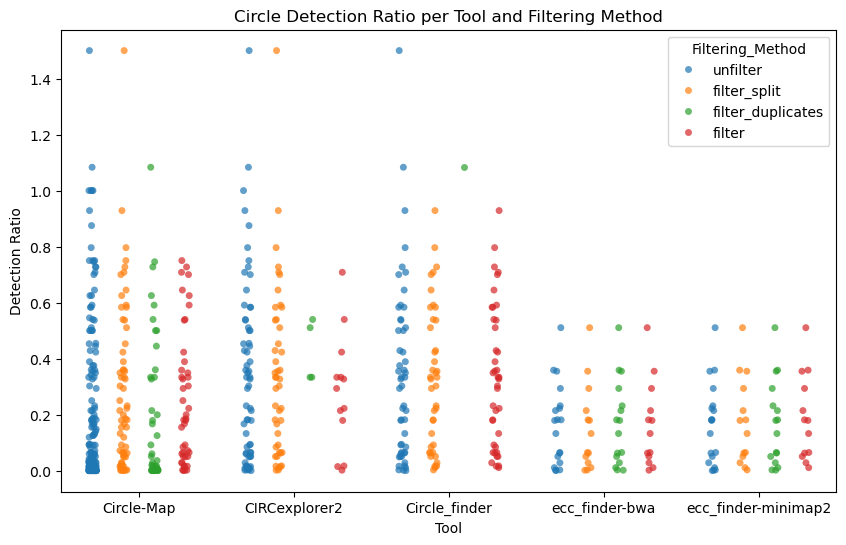

In [ ]:
# Example usage:
plot_circle_ratios(
    csv_path='/data/benchmarking/results/eccDNA/real/unfilter/Circle-Seq/circle_ratios_with_tools.csv',
    matrix_dir='/data/benchmarking/results/eccDNA/real',
    tools=['Circle-Map', 'CIRCexplorer2', 'Circle_finder', 'ecc_finder-bwa', 'ecc_finder-minimap2'],
    filtering_methods=['unfilter', 'filter_split', 'filter_duplicates', 'filter']
)

In [ ]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

def plot_tool_ratios_stripplot(base_path):
    """
    Reads circle ratio data from different matrix files located under base_path 
    and creates a strip plot comparing tool ratios with a custom color palette.

    Parameters:
    base_path (str): Base directory where the filtering method subfolders are located.
    """
    # Define filtering options and their corresponding file subfolders
    filtering_options = ['unfilter', 'filter_split', 'filter_duplicates', 'filter']
    
    # Create an empty DataFrame to store results
    data_list = []
    
    # Read and process data for each filtering method
    for filtering in filtering_options:
        # Correct file path based on the subfolder and matrix file name
        file_path = os.path.join(base_path, f"circRNA/real/{filtering}/CNT/circle_ratios_with_tools.csv")
        
        if os.path.exists(file_path):
            # Read the circle ratio data
            df = pd.read_csv(file_path)
            df['Matrix'] = filtering  # Add a column to indicate the filtering method
            data_list.append(df)
        else:
            print(f"Warning: File not found for {filtering} at {file_path}")

    # Check if any data was loaded
    if not data_list:
        print("No data to plot. Please check the file paths.")
        return
    
    # Combine all data into a single DataFrame
    final_df = pd.concat(data_list, ignore_index=True)
    
    # Define color palette
    palette = {'unfilter': '#d46014', 
               'filter_split': '#ddcd3d', 
               'filter_duplicates': '#064b76ff', 
               'filter': '#63bdf6ff'}
    
    # Create figure
    plt.figure(figsize=(12, 6))
    
    # Stripplot with jitter and dodge for different matrices
    sns.stripplot(x="Tools", y="Ratio", hue="Matrix", data=final_df, 
                  dodge=True, jitter=True, size=6, alpha=0.7, palette=palette)
    
    # Customizing the plot
    plt.xlabel('Number of Tools Used', fontsize=14)
    plt.ylabel('Ratio', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title('Tool Ratios Across Different Matrices', fontsize=16)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    sns.despine()
    plt.tight_layout()

    # Save and show plot
    save_path = os.path.join(base_path, 'tool_ratios_stripplot.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

# Example usage
base_path = '/data/benchmarking/results'
plot_tool_ratios_stripplot(base_path)



In [ ]:
import os
import pandas as pd

def calculate_circle_ratio_for_matrices(circle_info_path, read_info_path, matrix_paths):
    # Specify the columns to read from the circle info file
    circle_columns = ['Circle', 'Reads']
    circle_df = pd.read_csv(circle_info_path, usecols=circle_columns)
    
    # Specify the columns to read from the read info file
    read_columns = ['circle']
    read_df = pd.read_csv(read_info_path, usecols=read_columns)
    
    # Ensure consistent column names for merging
    read_df.rename(columns={'circle': 'Circle'}, inplace=True)
    circle_df['Circle'] = circle_df['Circle'].astype(str).str.replace(r'^chr', '', regex=True)
    read_df['Circle'] = read_df['Circle'].astype(str).str.replace(r'^chr', '', regex=True)
    
    # Calculate Total_Reads by counting occurrences of each circle in read_info
    total_reads = read_df.groupby('Circle').size().reset_index(name='Total_Reads')
    
    # Merge circle information with the total read counts
    merged_df = pd.merge(circle_df, total_reads, on='Circle', how='left').fillna(0)

    # Print circles missing from the merged dataset
    missing_circles = circle_df[~circle_df['Circle'].isin(merged_df['Circle'])]
    if not missing_circles.empty:
        print(f"Circles missing in read_info or total_reads: {missing_circles['Circle'].tolist()}")
    
    # Process each matrix file
    for matrix_path in matrix_paths:
        # Read matrix file
        matrix_columns = ['Circles', 'CIRCexplorer2', 'circRNA_finder', 'CIRIquant', 'find_circ', 'segemehl']
        matrix_df = pd.read_csv(matrix_path, usecols=matrix_columns)
        
        # Ensure consistent column names
        matrix_df.rename(columns={'Circles': 'Circle'}, inplace=True)
        matrix_df['Circle'] = matrix_df['Circle'].astype(str).str.replace(r'^chr', '', regex=True)
        
        # Calculate Tools column
        matrix_df['Tools'] = matrix_df[['CIRCexplorer2', 'circRNA_finder', 'CIRIquant', 'find_circ', 'segemehl']].sum(axis=1)
        
        # Merge with the main dataframe
        final_df = pd.merge(merged_df, matrix_df[['Circle', 'Tools']], on='Circle', how='left')
        
        # Check for missing circles after merging with matrix
        missing_after_merge = merged_df[~merged_df['Circle'].isin(final_df['Circle'])]
        if not missing_after_merge.empty:
            print(f"Circles missing in matrix file {matrix_path}: {missing_after_merge['Circle'].tolist()}")
        
        # Calculate the ratio
        final_df['Ratio'] = final_df['Reads'] / final_df['Total_Reads']
        
        # Define the output path
        output_dir = os.path.dirname(matrix_path)
        output_file = os.path.join(output_dir, "circle_ratios_with_tools.csv")
        
        # Save to CSV
        final_df[['Circle', 'Tools', 'Reads', 'Total_Reads', 'Ratio']].to_csv(output_file, index=False)
        print(f"Saved: {output_file}")

# Example usage
matrix_paths = [
    "/data/benchmarking/results/circRNA/real/unfilter/RNASE/matrix.csv",
    "/data/benchmarking/results/circRNA/real/filter_split/RNASE/matrix.csv",
    "/data/benchmarking/results/circRNA/real/filter_duplicates/RNASE/matrix.csv",
    "/data/benchmarking/results/circRNA/real/filter/RNASE/matrix.csv"
]

calculate_circle_ratio_for_matrices(
    "/data/benchmarking/results_old/circRNA/real/unfilter/RNASE/circles_info.csv",
    "/data/benchmarking/results_old/circRNA/real/unfilter/RNASE/read_info.csv",
    matrix_paths
)



In [ ]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

def plot_tool_ratios_stripplot(base_path):
    """
    Reads circle ratio data from different matrix files located under base_path 
    and creates a strip plot comparing tool ratios with a custom color palette.

    Parameters:
    base_path (str): Base directory where the filtering method subfolders are located.
    """
    # Define filtering options and their corresponding file subfolders
    filtering_options = ['unfilter', 'filter_split', 'filter_duplicates', 'filter']
    
    # Create an empty DataFrame to store results
    data_list = []
    
    # Read and process data for each filtering method
    for filtering in filtering_options:
        # Correct file path based on the subfolder and matrix file name
        file_path = os.path.join(base_path, f"circRNA/real/{filtering}/RNASE/circle_ratios_with_tools.csv")
        
        if os.path.exists(file_path):
            # Read the circle ratio data
            df = pd.read_csv(file_path)
            df['Matrix'] = filtering  # Add a column to indicate the filtering method
            data_list.append(df)
        else:
            print(f"Warning: File not found for {filtering} at {file_path}")

    # Check if any data was loaded
    if not data_list:
        print("No data to plot. Please check the file paths.")
        return
    
    # Combine all data into a single DataFrame
    final_df = pd.concat(data_list, ignore_index=True)
    
    # Define color palette
    palette = {'unfilter': '#d46014', 
               'filter_split': '#ddcd3d', 
               'filter_duplicates': '#064b76ff', 
               'filter': '#63bdf6ff'}
    
    # Create figure
    plt.figure(figsize=(12, 6))
    
    # Stripplot with jitter and dodge for different matrices
    sns.stripplot(x="Tools", y="Ratio", hue="Matrix", data=final_df, 
                  dodge=True, jitter=True, size=6, alpha=0.7, palette=palette)
    
    # Customizing the plot
    plt.xlabel('Number of Tools Used', fontsize=14)
    plt.ylabel('Ratio', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title('Tool Ratios Across Different Matrices', fontsize=16)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    sns.despine()
    plt.tight_layout()

    # Save and show plot
    save_path = os.path.join(base_path, 'tool_ratios_stripplot.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

# Example usage
base_path = '/data/benchmarking/results'
plot_tool_ratios_stripplot(base_path)


In [ ]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

def plot_tool_ratios_stripplot(base_path):
    """
    Reads circle ratio data from different matrix files located under base_path 
    and creates a strip plot comparing tool ratios.
    
    Parameters:
    base_path (str): Base directory where the filtering method subfolders are located.
    """
    # Define filtering options and their corresponding file subfolders
    filtering_options = ['unfilter', 'filter_split', 'filter_duplicates', 'filter']
    
    # Create an empty DataFrame to store results
    data_list = []
    
    # Read and process data for each filtering method
    for filtering in filtering_options:
        # Correct file path based on the subfolder and matrix file name
        file_path = os.path.join(base_path, f"circRNA/real/{filtering}/CNT/matrix.csv")
        
        if os.path.exists(file_path):
            # Read the circle ratio data
            df = pd.read_csv(file_path)
            df['Matrix'] = filtering  # Add a column to indicate the filtering method
            data_list.append(df)
        else:
            print(f"Warning: File not found for {filtering} at {file_path}")

    # Check if any data was loaded
    if not data_list:
        print("No data to plot. Please check the file paths.")
        return
    
    # Combine all data into a single DataFrame
    final_df = pd.concat(data_list, ignore_index=True)
    
    # Create figure
    plt.figure(figsize=(12, 6))
    
    # Stripplot with jitter and dodge for different matrices
    sns.stripplot(x="Tools", y="Ratio", hue="Matrix", data=final_df, 
                  dodge=True, jitter=True, size=6, alpha=0.7, palette="viridis")

    # Adjust labels and legend
    plt.xlabel('Number of Tools Used', fontsize=14)
    plt.ylabel('Ratio', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title('Tool Ratios Across Different Matrices', fontsize=16)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    sns.despine()
    plt.tight_layout()

    # Save and show plot
    save_path = os.path.join(base_path, 'tool_ratios_stripplot.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

# Example usage
base_path = '/data/benchmarking/results'
plot_tool_ratios_stripplot(base_path)


In [ ]:
def plot_combinations(data, output_dir=None, filename='circular_data_plot.png', plot_type='intersect'):
    """
    Plots the circular data as stacked bar charts for True Positives, False Negatives, and False Positives,
    with F-scores displayed inside the bars.

    Parameters:
        data (dict): Dictionary containing 'Combination', 'True Positives', 'False Negatives',
                     'False Positives', and 'F-scores' data.
        output_dir (str): Directory path where the plot image will be saved. If None, plot will not be saved.
        filename (str): Name of the file to save the plot image.
        plot_type (str): Type of plot indicating 'union' or 'intersect'.
    """
    # Create the DataFrame
    df = pd.DataFrame(data)

    # Initialize the matplotlib figure
    plt.figure(figsize=(6, 4))

    # Plot the 'True Positives' bars
    sns.set_color_codes("pastel")
    sns.barplot(x="True Positives", y="Combination", data=df, color="b", label="True Positives")

    # Plot the 'False Negatives' bars, stacked on 'True Positives'
    sns.set_color_codes("muted")
    sns.barplot(x="False Negatives", y="Combination", data=df, color="r", 
                left=df['True Positives'], label="False Negatives")

    # Plot the 'False Positives' bars, stacked on 'True Positives' + 'False Negatives'
    sns.set_color_codes("dark")
    sns.barplot(x="False Positives", y="Combination", data=df, color="g", 
                left=df['True Positives'] + df['False Negatives'], label="False Positives")

    # Add F-score values inside the bars
    for i, row in df.iterrows():
        # Position for the F-score text
        total_height = row['True Positives'] + row['False Negatives']
        plt.text(total_height - 550, i, f"{row['F-scores']:.4f}", 
                 color="black", va='center', fontsize=10, fontweight='bold')

    # Add informative axis labels and title
    plt.xlabel("#eccDNA", fontsize=12)
    plt.ylabel("", fontsize=12)
    #plt.title(f"Analysis of eccDNA Detection Method Combination", fontsize=14)

    # Add a vertical line at x=1000
    plt.axvline(x=1000, color='k', linestyle='--')

    # Remove spines
    sns.despine(left=True, bottom=True)

    # Add legend
    plt.legend(ncol=1, loc="center left", bbox_to_anchor=(1, 0.5), frameon=False)

    # Save the plot if output_dir is specified
    if output_dir is not None:
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        save_path = os.path.join(output_dir, filename)
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    else:
        # Show the plot if output_dir is None
        plt.show()


In [ ]:
# Example usage
data = {
    'Combination': ['Unfilter', 'Filter_split', 'Filter_duplicates', 'Filter'],
    'True Positives': [901, 893, 879, 891],
    'False Negatives': [99, 107, 121, 109],
    'False Positives': [12, 6, 11, 6],
    'F-scores': [0.9412, 0.9405, 0.9302, 0.9394]
}

# Specify the output directory
output_dir = 'results/eccDNA/insilico'
filename = 'combination_CE-CM-EM.png'

# Plot and save the circular data plot with F1 scores
plot_combinations(data, output_dir, filename=filename, plot_type='union-intersect')

In [ ]:
# Example usage
data = {
    'Combination': ['Unfilter', 'Filter_split', 'Filter_duplicates', 'Filter'],
    'True Positives': [902,893,889,893],
    'False Negatives': [98,107,111,107],
    'False Positives': [12,6,11,6],
    'F-scores': [0.9425,0.9405,0.9358,0.9405]
}

# Specify the output directory
output_dir = 'results/eccDNA/insilico'
filename = 'combination_CE-CM-CD-EM.png'

# Plot and save the circular data plot with F1 scores
plot_combinations(data, output_dir, filename=filename, plot_type='union-intersect')

In [ ]:
# Example usage
data = {
    'Combination': ['Unfilter', 'Filter_split', 'Filter_duplicates', 'Filter'],
    'True Positives': [965,965,761,761],
    'False Negatives': [35,35,239,239],
    'False Positives': [12,12,11,11],
    'F-scores': [0.9762,0.9762,0.8590,0.8589]
}

# Specify the output directory
output_dir = 'results/circRNA/insilico'
filename = 'combination_CE-CQ-SE.png'

# Plot and save the circular data plot with F1 scores
plot_combinations(data, output_dir, filename=filename, plot_type='union-intersect')

In [ ]:
# Example usage
data = {
    'Combination': ['Unfilter', 'Filter_split', 'Filter_duplicates', 'Filter'],
    'True Positives': [965,965,767,764],
    'False Negatives': [35,35,233,236],
    'False Positives': [12,12,11,11],
    'F-scores': [0.9762,0.9762,0.8627,0.8608]
}

# Specify the output directory
output_dir = 'results/circRNA/insilico'
filename = 'combination_CE-CQ-FC-SE.png'

# Plot and save the circular data plot with F1 scores
plot_combinations(data, output_dir, filename=filename, plot_type='union-intersect')

In [70]:
start = 3290460
end = 3290520
bamobject = pysam.AlignmentFile(bam_file, "rb")
CJ1 = len(set([read.query_name for read in bamobject.fetch('1', start - 1, end + 1)]))

print(CJ1)

1


['SRR6315430.10697220', 'SRR6315430.10697220']

In [77]:
import pysam
import pandas as pd

# Load the matrix
matrix_file = "results/eccDNA/real/unfilter/Circle-Seq/matrix.csv"
bam_file = "/data/benchmarking/output/eccDNA/real/Circle-Seq/bwa/CS_sorted_unknown_circle.bam"

# Open BAM file
bamobject = pysam.AlignmentFile(bam_file, "rb")

# Read the CSV
df = pd.read_csv(matrix_file)

# Prepare results
results = []

for index, row in df.iterrows():
    circle = row["Circles"]
    chrom, coords = circle.split(":")
    start, end = map(int, coords.split("-"))

    try:
        # Count how many tools detected the circle (how many 1s)
        tools_detected = row.iloc[1:].sum()

        # Fetch CJ1 Reads (start-1, start, start+1)
        CJ1 = [read.query_name for read in bamobject.fetch(chrom, start - 1, start + 1)]

        # Fetch CJ2 Reads (end-1, end, end+1)
        CJ2 = [read.query_name for read  in bamobject.fetch(chrom, end - 1, end + 1)]

        # Sum of CJ1 and CJ2
        CJ_reads = len(set(CJ1 + CJ2))

        # Fetch total reads in the region (start-1 to end+1)
        total_reads = len(set([read.query_name for read in bamobject.fetch(chrom, start - 1, end + 1)]))

        # Compute ratios
        ratio = CJ_reads / total_reads if total_reads > 0 else 0
        circle_length = end - start + 1
        ratio2 = ratio / circle_length if circle_length > 0 else 0

        # Store results
        results.append([circle, circle_length, tools_detected, CJ_reads, total_reads, ratio, ratio2])

    except ValueError as e:
        # Handle the error if there's an invalid chromosome or other issue
        print(f"Skipping invalid chromosome: {chrom} or region {circle}. Error: {e}")
        continue

# Close BAM file
bamobject.close()

# Create output DataFrame
output_df = pd.DataFrame(results, columns=[
    "Circle", "Length", "Tools", "CJ Reads", "Total Reads", "Ratio", "Ratio2"
])

# Save to CSV
output_file = "results/eccDNA/real/unfilter/Circle-Seq/matrix_with_reads.csv"
output_df.to_csv(output_file, index=False)

print(f"Saved output to {output_file}")


Skipping invalid chromosome: 14_GL000225v1_random or region 14_GL000225v1_random:67269-67608. Error: invalid contig `14_GL000225v1_random`
Skipping invalid chromosome: 14_GL000225v1_random or region 14_GL000225v1_random:117716-117862. Error: invalid contig `14_GL000225v1_random`
Skipping invalid chromosome: 14_GL000225v1_random or region 14_GL000225v1_random:85560-167884. Error: invalid contig `14_GL000225v1_random`
Skipping invalid chromosome: M or region M:0-16569. Error: invalid contig `M`
Skipping invalid chromosome: Un_GL000219v1 or region Un_GL000219v1:51169-51639. Error: invalid contig `Un_GL000219v1`
Skipping invalid chromosome: Un_KI270466v1 or region Un_KI270466v1:696-797. Error: invalid contig `Un_KI270466v1`
Skipping invalid chromosome: Un_KI270751v1 or region Un_KI270751v1:150318-150730. Error: invalid contig `Un_KI270751v1`
Skipping invalid chromosome: M or region M:342-1130. Error: invalid contig `M`
Skipping invalid chromosome: M or region M:394-2802. Error: invalid con

KeyboardInterrupt: 

In [90]:
import pysam
import pandas as pd

def process_circle_matrix(matrix_file, bam_file, output_file):
    """
    Processes a circle matrix and extracts read counts from a BAM file.

    Parameters:
        matrix_file (str): Path to the input CSV containing circle regions.
        bam_file (str): Path to the BAM file.
        output_file (str): Path to save the output CSV.

    Returns:
        None
    """
    # Open BAM file
    bamobject = pysam.AlignmentFile(bam_file, "rb")

    # Read the CSV
    df = pd.read_csv(matrix_file)

    # Prepare results
    results = []

    for index, row in df.iterrows():
        circle = row["Circles"]
        chrom, coords = circle.split(":")
        start, end = map(int, coords.split("-"))

        try:
            # Count how many tools detected the circle (how many 1s)
            tools_detected = row.iloc[1:].sum()

            # Fetch CJ1 Reads (start-1, start, start+1)
            CJ1 = {read.query_name for read in bamobject.fetch(chrom, start - 1, start + 1)}
            CJ1_n = len(CJ1)

            # Fetch CJ2 Reads (end-1, end, end+1)
            CJ2 = {read.query_name for read in bamobject.fetch(chrom, end - 1, end + 1)}
            CJ2_n = len(CJ2)

            # Sum of CJ1 and CJ2
            CJ_unique_reads = len(CJ1 | CJ2)
            CJ_reads = CJ1_n + CJ2_n

            # Fetch total reads in the region (start-1 to end+1)
            total_reads = len({read.query_name for read in bamobject.fetch(chrom, start - 1, end + 1)})

            # Compute ratios
            ratio_CJ1 = CJ1_n / CJ_reads if CJ_reads > 0 else 0
            ratio_CJ2 = CJ2_n / CJ_reads if CJ_reads > 0 else 0

            # Determine max and min CJ
            max_CJ = max(ratio_CJ1, ratio_CJ2)
            min_CJ = min(ratio_CJ1, ratio_CJ2)

            # Compute CJ max and min difference
            diff_CJ = max_CJ - min_CJ

            # Compute additional ratios
            ratio = CJ_unique_reads / total_reads if total_reads > 0 else 0
            circle_length = end - start + 1
            ratio2 = ratio / circle_length if circle_length > 0 else 0

            # Store results
            results.append([circle, circle_length, tools_detected, CJ1_n, CJ2_n, CJ_unique_reads, CJ_reads,  min_CJ, max_CJ, total_reads, ratio])

        except ValueError as e:
            # Handle the error if there's an invalid chromosome or other issue
            print(f"Skipping invalid chromosome: {chrom} or region {circle}. Error: {e}")
            continue

    # Close BAM file
    bamobject.close()

    # Create output DataFrame
    output_df = pd.DataFrame(results, columns=[
        "Circle", "Length", "Tools", "CJ1 Reads", "CJ2 Reads", "CJ Unique Reads", "CJ Reads", "min CJ", "max CJ", "diff CJ", "Total Reads", "Ratio"
    ])

    # Save to CSV
    output_df.to_csv(output_file, index=False)
    print(f"Saved output to {output_file}")


In [91]:
filtering = ['unfilter', 'filter_split', 'filter_duplicates', 'filter']

for filter in filtering:
    process_circle_matrix(
        f"results/eccDNA/real/{filter}/Circle-Seq/matrixcopy.csv",
        f"/data/benchmarking/output/eccDNA/real/Circle-Seq/bwa/CS_sorted_unknown_circle.bam",
        f"results/eccDNA/real/{filter}/Circle-Seq/matrix_with_reads.csv"
    )

Saved output to results/eccDNA/real/unfilter/Circle-Seq/matrix_with_reads.csv


FileNotFoundError: [Errno 2] No such file or directory: 'results/eccDNA/real/filter_split/Circle-Seq/matrixcopy.csv'

In [82]:
filtering = ['unfilter', 'filter_split', 'filter_duplicates', 'filter']

for filter in filtering:
    process_circle_matrix(
        f"results/eccDNA/real/{filter}/ATAC-seq/matrix.csv",
        f"/data/benchmarking/output/eccDNA/real/ATAC-seq/bwa/AS_sorted_unknown_circle.bam",
        f"results/eccDNA/real/{filter}/ATAC-seq/matrix_with_reads.csv"
    )

Skipping invalid chromosome: MT or region MT:0-16299. Error: start out of range (-1)
Skipping invalid chromosome: 1_GL456210_random or region 1_GL456210_random:31717-33783. Error: invalid contig `1_GL456210_random`
Skipping invalid chromosome: 1_GL456210_random or region 1_GL456210_random:124714-127215. Error: invalid contig `1_GL456210_random`
Skipping invalid chromosome: 1_GL456210_random or region 1_GL456210_random:153393-155990. Error: invalid contig `1_GL456210_random`
Skipping invalid chromosome: 1_GL456211_random or region 1_GL456211_random:140508-142928. Error: invalid contig `1_GL456211_random`
Skipping invalid chromosome: 5_JH584299_random or region 5_JH584299_random:251839-253778. Error: invalid contig `5_JH584299_random`
Skipping invalid chromosome: Un_GL456239 or region Un_GL456239:29705-40056. Error: invalid contig `Un_GL456239`
Skipping invalid chromosome: Un_GL456378 or region Un_GL456378:6498-10505. Error: invalid contig `Un_GL456378`
Skipping invalid chromosome: Un_GL

In [83]:
import pysam
import pandas as pd

def process_circle_matrix(matrix_file, bam_file, output_file):
    """
    Processes a circle matrix and extracts read counts from a BAM file.

    Parameters:
        matrix_file (str): Path to the input CSV containing circle regions.
        bam_file (str): Path to the BAM file.
        output_file (str): Path to save the output CSV.

    Returns:
        None
    """
    # Open BAM file
    bamobject = pysam.AlignmentFile(bam_file, "rb")

    # Read the CSV
    df = pd.read_csv(matrix_file)

    # Prepare results
    results = []

    for index, row in df.iterrows():
        circle = row["Circles"]
        chrom, coords = circle.split(":")
        chrom = 'chr' + chrom
        start, end = map(int, coords.split("-"))

        try:
            # Count how many tools detected the circle (how many 1s)
            tools_detected = row.iloc[1:].sum()

            # Fetch CJ1 Reads (start-1, start, start+1)
            CJ1 = {read.query_name for read in bamobject.fetch(chrom, start - 1, start + 1)}

            # Fetch CJ2 Reads (end-1, end, end+1)
            CJ2 = {read.query_name for read in bamobject.fetch(chrom, end - 1, end + 1)}

            # Sum of CJ1 and CJ2
            CJ_reads = len(CJ1 | CJ2)

            # Fetch total reads in the region (start-1 to end+1)
            total_reads = len({read.query_name for read in bamobject.fetch(chrom, start - 1, end + 1)})

            # Compute ratios
            ratio = CJ_reads / total_reads if total_reads > 0 else 0
            circle_length = end - start + 1
            ratio2 = ratio / circle_length if circle_length > 0 else 0

            # Store results
            results.append([circle, circle_length, tools_detected, CJ_reads, total_reads, ratio, ratio2])

        except ValueError as e:
            # Handle the error if there's an invalid chromosome or other issue
            print(f"Skipping invalid chromosome: {chrom} or region {circle}. Error: {e}")
            continue

    # Close BAM file
    bamobject.close()

    # Create output DataFrame
    output_df = pd.DataFrame(results, columns=[
        "Circle", "Length", "Tools", "CJ Reads", "Total Reads", "Ratio", "Ratio2"
    ])

    # Save to CSV
    output_df.to_csv(output_file, index=False)
    print(f"Saved output to {output_file}")

In [84]:
filtering = ['unfilter', 'filter_split', 'filter_duplicates', 'filter']

for filter in filtering:
    process_circle_matrix(
        f"/data/benchmarking/results/circRNA/real/{filter}/CNT/matrix.csv",
        f"/data/benchmarking/output/circRNA/real/star/CNT.Aligned.sorted.out.bam",
        f"/data/benchmarking/results/circRNA/real/{filter}/CNT/matrix_with_reads.csv"
    )

Skipping invalid chromosome: chrM or region M:0-16569. Error: start out of range (-1)
Saved output to /data/benchmarking/results/circRNA/real/unfilter/CNT/matrix_with_reads.csv
Skipping invalid chromosome: chrM or region M:0-16569. Error: start out of range (-1)
Saved output to /data/benchmarking/results/circRNA/real/filter_split/CNT/matrix_with_reads.csv
Skipping invalid chromosome: chrM or region M:0-16569. Error: start out of range (-1)
Saved output to /data/benchmarking/results/circRNA/real/filter_duplicates/CNT/matrix_with_reads.csv
Skipping invalid chromosome: chrM or region M:0-16569. Error: start out of range (-1)
Saved output to /data/benchmarking/results/circRNA/real/filter/CNT/matrix_with_reads.csv


In [85]:
filtering = ['unfilter', 'filter_split', 'filter_duplicates', 'filter']

for filter in filtering:
    process_circle_matrix(
        f"/data/benchmarking/results/circRNA/real/{filter}/RNASE/matrix.csv",
        f"/data/benchmarking/output/circRNA/real/star/RNASE.Aligned.sorted.out.bam",
        f"/data/benchmarking/results/circRNA/real/{filter}/RNASE/matrix_with_reads.csv"
    )

KeyboardInterrupt: 

Loaded data for unfilter and Circle-Map:
             Circles  Circle-Map  CIRCexplorer2  Circle_finder  \
0  1:3296097-3307410           1              1              0   
1  1:4073989-4074516           1              1              1   
2  1:4920949-4921189           1              1              1   
3  1:5671780-5678995           1              0              0   
4  1:5675400-5675976           1              0              0   

   ecc_finder-bwa  ecc_finder-minimap2  
0               0                    0  
1               1                    1  
2               1                    1  
3               0                    0  
4               0                    0  
Loaded data for filter_split and Circle-Map:
             Circles  Circle-Map  CIRCexplorer2  Circle_finder  \
0  1:4073989-4074516           1              1              1   
1  1:4920949-4921189           1              1              1   
2  1:5671780-5678995           1              0              0   
3  1:61

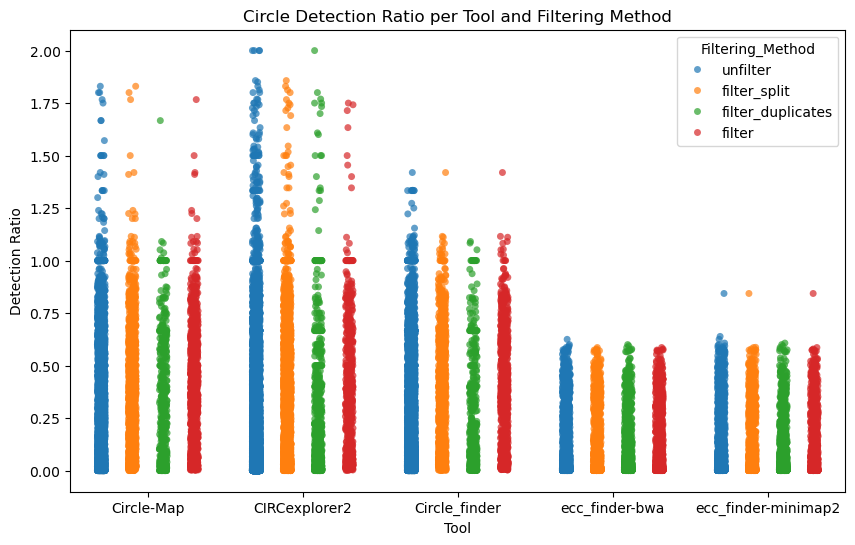

In [56]:
# Example usage:
plot_circle_ratios(
    csv_path='/data/benchmarking/results/eccDNA/real/unfilter/Circle-Seq/matrix_with_reads.csv',
    matrix_dir='/data/benchmarking/results/eccDNA/real',
    tools=['Circle-Map', 'CIRCexplorer2', 'Circle_finder', 'ecc_finder-bwa', 'ecc_finder-minimap2'],
    filtering_methods=['unfilter', 'filter_split', 'filter_duplicates', 'filter']
)